In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import string
import spacy
from tqdm import tqdm
import tensorflow as tf
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

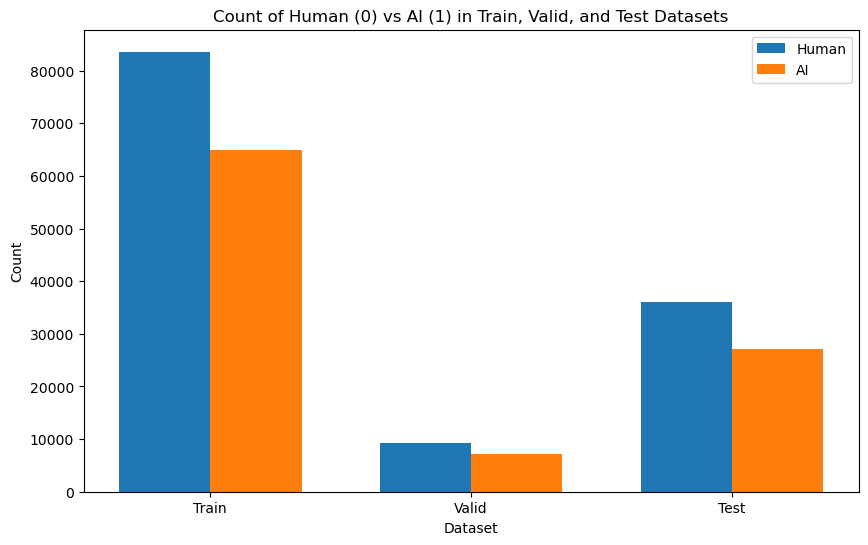

In [11]:
human_counts = [
    label_counts_train.get(0, 0),  
    label_counts_valid.get(0, 0),  
    label_counts_test_original.get(0, 0) 
]

ai_counts = [
    label_counts_train.get(1, 0), 
    label_counts_valid.get(1, 0), 
    label_counts_test_original.get(1, 0) 
]

labels = ['Train', 'Valid', 'Test']
x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars_human = ax.bar(x - width/2, human_counts, width, label='Human')
bars_ai = ax.bar(x + width/2, ai_counts, width, label='AI')

ax.set_xlabel('Dataset')
ax.set_ylabel('Count')
ax.set_title('Count of Human (0) vs AI (1) in Train, Valid, and Test Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

plt.show()


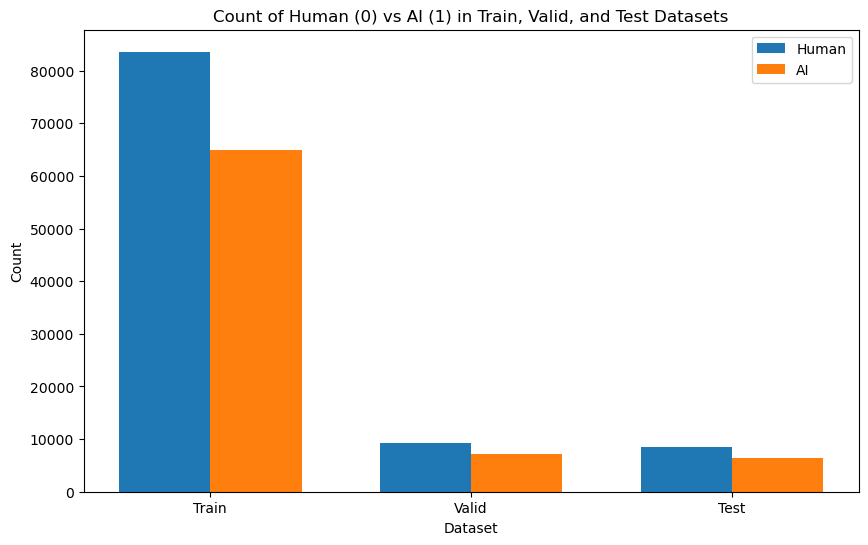

In [12]:
human_counts = [
    label_counts_train.get(0, 0),  
    label_counts_valid.get(0, 0),  
    label_counts_test_duplicate.get(0, 0) 
]

ai_counts = [
    label_counts_train.get(1, 0), 
    label_counts_valid.get(1, 0), 
    label_counts_test_duplicate.get(1, 0) 
]

labels = ['Train', 'Valid', 'Test']
x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars_human = ax.bar(x - width/2, human_counts, width, label='Human')
bars_ai = ax.bar(x + width/2, ai_counts, width, label='AI')

ax.set_xlabel('Dataset')
ax.set_ylabel('Count')
ax.set_title('Count of Human (0) vs AI (1) in Train, Valid, and Test Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

plt.show()


In [3]:
import pandas as pd

train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
valid_data = pd.read_csv("valid_data.csv")

In [4]:
train_data

,text,label,clean_text,lemmatized_text,stemmed_text,pos,combined_text
0,"AC Milan coach, Pippo Inzaghi, took some of hi...",1,ac milan coach pippo inzaghi took some of his ...,ac milan coach pippo inzaghi take some of his ...,ac milan coach pippo inzaghi took some of his ...,PROPN PROPN PROPN PROPN PROPN VERB PRON ADP PR...,ac milan coach pippo inzaghi took some of his ...
1,Pam Jackson and Cheryl Miller were last seen o...,0,pam jackson and cheryl miller were last seen o...,pam jackson and cheryl miller be last see on m...,pam jackson and cheryl miller were last seen o...,PROPN PROPN CCONJ PROPN PROPN AUX ADV VERB ADP...,pam jackson and cheryl miller were last seen o...
2,A female Tawny Frogmouth born at the St. Louis...,1,a female tawny frogmouth born at the st louis ...,a female tawny frogmouth bear at the st louis ...,a femal tawni frogmouth born at the st loui zo...,DET ADJ NOUN NOUN VERB ADP DET PROPN PROPN NOU...,a female tawny frogmouth born at the st louis ...
3,Victoria Azarenka has been struggling with a f...,0,victoria azarenka has been struggling with a f...,victoria azarenka have be struggle with a foot...,victoria azarenka has been struggl with a foot...,PROPN PROPN AUX AUX VERB ADP DET NOUN NOUN NOU...,victoria azarenka has been struggling with a f...
4,A photograph has emerged of a baby crawling pe...,1,a photograph has emerged of a baby crawling pe...,a photograph have emerge of a baby crawl peril...,a photograph has emerg of a babi crawl peril c...,DET NOUN AUX VERB ADP DET NOUN VERB ADV ADJ AD...,a photograph has emerged of a baby crawling pe...
...,...,...,...,...,...,...,...
148397,"Hi, Welcome to Health care magic forum. ...",0,hi welcome to health care magic forum it is co...,hi welcome to health care magic forum it be co...,hi welcom to health care magic forum it is con...,INTJ VERB ADP NOUN NOUN NOUN NOUN PRON AUX VER...,hi welcome to health care magic forum it is co...
148398,"The water is constantly recycled , so it does ...",0,the water is constantly recycled so it does nt...,the water be constantly recycle so it do not m...,the water is constant recycl so it doe nt matt...,DET NOUN AUX ADV VERB SCONJ PRON AUX PART VERB...,the water is constantly recycled so it does nt...
148399,"Nothing . Spain wo n't recognise it , the EU w...",0,nothing spain wo nt recognise it the eu wo nt ...,nothing spain will not recognise it the eu wil...,noth spain wo nt recognis it the eu wo nt reco...,PRON PROPN AUX PART VERB PRON DET PROPN AUX PA...,nothing spain wo nt recognise it the eu wo nt ...
148400,Writing a short poem In seventeen syllables Is...,0,writing a short poem in seventeen syllables is...,write a short poem in seventeen syllable be ve...,write a short poem in seventeen syllabl is ver...,VERB DET ADJ NOUN ADP NUM NOUN AUX ADV ADJ,writing a short poem in seventeen syllables is...


In [5]:
valid_data

,text,label,clean_text,lemmatized_text,stemmed_text,pos,combined_text
0,"Engineering multinational, Arup, has released ...",1,engineering multinational arup has released a ...,engineering multinational arup have release a ...,engin multin arup has releas a report entitl i...,NOUN ADJ NOUN AUX VERB DET NOUN VERB PRON ADJ ...,engineering multinational arup has released a ...
1,A hostage situation and fatal police standoff ...,1,a hostage situation and fatal police standoff ...,a hostage situation and fatal police standoff ...,a hostag situat and fatal polic standoff erupt...,DET NOUN NOUN CCONJ ADJ NOUN NOUN VERB ADP DET...,a hostage situation and fatal police standoff ...
2,"Authorities took Eugene, Oregon man Jeffrey Wr...",0,authorities took eugene oregon man jeffrey wri...,authority take eugene oregon man jeffrey wrigh...,author took eugen oregon man jeffrey wright le...,NOUN VERB NOUN PROPN PROPN PROPN PROPN VERB AD...,authorities took eugene oregon man jeffrey wri...
3,"Inter Milan, despite resting several key playe...",1,inter milan despite resting several key player...,inter milan despite rest several key player su...,inter milan despit rest sever key player such ...,PROPN PROPN SCONJ VERB ADJ ADJ NOUN ADJ ADP NO...,inter milan despite resting several key player...
4,Scientists hope deadly creatures can save huma...,0,scientists hope deadly creatures can save huma...,scientist hope deadly creature can save human ...,scientist hope dead creatur can save human gil...,NOUN VERB ADJ NOUN AUX VERB NOUN VERB NOUN NOU...,scientists hope deadly creatures can save huma...
...,...,...,...,...,...,...,...
16487,I will now sum up the Illuminati for you . Rea...,0,i will now sum up the illuminati for you ready...,I will now sum up the illuminati for you ready...,i will now sum up the illuminati for you readi...,PRON AUX ADV VERB ADP DET NOUN ADP PRON ADJ NO...,i will now sum up the illuminati for you ready...
16488,Game programmers will need to have a perfectly...,0,game programmers will need to have a perfectly...,game programmer will need to have a perfectly ...,game programm will need to have a perfect comp...,NOUN NOUN AUX VERB PART VERB DET ADV VERB NOUN...,game programmers will need to have a perfectly...
16489,You can see stars thousands of light years awa...,0,you can see stars thousands of light years awa...,you can see star thousand of light year away j...,you can see star thousand of light year away j...,PRON AUX VERB NOUN NOUN ADP ADJ NOUN ADV ADV V...,you can see stars thousands of light years awa...
16490,Just yesterday saw an article saying that worm...,0,just yesterday saw an article saying that worm...,just yesterday see an article say that worm ha...,just yesterday saw an articl say that worm hav...,ADV NOUN VERB DET NOUN VERB SCONJ NOUN AUX VER...,just yesterday saw an article saying that worm...


In [6]:
test_data

,text,label,clean_text,lemmatized_text,stemmed_text,pos,combined_text
0,You could forgive Apple's legal team for comin...,0,you could forgive apples legal team for coming...,you could forgive apple legal team for come ac...,you could forgiv appl legal team for come acro...,PRON AUX VERB NOUN ADJ NOUN ADP VERB ADP DET A...,you could forgive apples legal team for coming...
1,Liberal and conservative are two different way...,1,liberal and conservative are two different way...,liberal and conservative be two different way ...,liber and conserv are two differ way of think ...,ADJ CCONJ ADJ AUX NUM ADJ NOUN ADP VERB ADP NO...,liberal and conservative are two different way...
2,The sun is also white . It just appears yellow...,0,the sun is also white it just appears yellow next,the sun be also white it just appear yellow next,the sun is also white it just appear yellow next,DET NOUN AUX ADV ADJ PRON ADV VERB ADJ ADP,the sun is also white it just appears yellow n...
3,North Lanarkshire Council in Scotland has laun...,1,north lanarkshire council in scotland has laun...,north lanarkshire council in scotland have lau...,north lanarkshir council in scotland has launc...,PROPN PROPN PROPN ADP PROPN AUX VERB DET NOUN ...,north lanarkshire council in scotland has laun...
4,"""I was looking for something that was comparab...",0,i was looking for something that was comparabl...,I be look for something that be comparable for...,i was look for someth that was compar for my p...,PRON AUX VERB ADP PRON PRON AUX ADJ ADP PRON NOUN,i was looking for something that was comparabl...
...,...,...,...,...,...,...,...
14835,These Vienna talks for the first time include ...,0,these vienna talks for the first time include ...,these vienna talk for the first time include a...,these vienna talk for the first time includ al...,DET NOUN VERB ADP DET ADJ NOUN VERB DET DET AD...,these vienna talks for the first time include ...
14836,India's film censorship board has granted a ce...,1,indias film censorship board has granted a cer...,indias film censorship board have grant a cert...,india film censorship board has grant a certif...,PROPN PROPN NOUN NOUN AUX VERB DET NOUN ADP DE...,indias film censorship board has granted a cer...
14837,"Expanding ammunition, also known as hollow poi...",1,expanding ammunition also known as hollow poin...,expand ammunition also know as hollow point bu...,expand ammunit also known as hollow point bull...,VERB NOUN ADV VERB ADP ADJ NOUN NOUN AUX VERB ...,expanding ammunition also known as hollow poin...
14838,They will have in-depth discussions on relatio...,0,they will have indepth discussions on relation...,they will have indepth discussion on relation ...,they will have indepth discuss on relat betwee...,PRON AUX VERB ADJ NOUN ADP NOUN ADP DET NUM NO...,they will have indepth discussions on relation...


In [7]:
train_x, test_x, train_y, test_y = train_data['combined_text'], test_data['combined_text'], train_data['label'], test_data['label']
train_x, valid_x, train_y, valid_y = train_data['combined_text'], valid_data['combined_text'], train_data['label'], valid_data['label']

In [8]:
# TF-IDF Vectorization using all combined text features
tfidf = TfidfVectorizer(max_features=5000)
train_x_tfidf = tfidf.fit_transform(train_x).toarray()
valid_x_tfidf = tfidf.transform(valid_x).toarray()
test_x_tfidf = tfidf.transform(test_x).toarray()

# Convert labels to numpy arrays
train_y = np.array(train_y)
valid_y = np.array(valid_y)
test_y = np.array(test_y)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_x_tfidf, train_y)).batch(64).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_x_tfidf, valid_y)).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x_tfidf, test_y)).batch(64).prefetch(tf.data.AUTOTUNE)

2024-10-15 18:18:36.490957: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-10-15 18:18:36.537604: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5936080000 exceeds 10% of free system memory.


Epoch 1/5
4638/4638 [==============================] - 1638s 353ms/step - loss: 0.3864 - accuracy: 0.7986 - val_loss: 0.3215 - val_accuracy: 0.8378
Epoch 2/5
4638/4638 [==============================] - 1483s 320ms/step - loss: 0.3063 - accuracy: 0.8463 - val_loss: 0.3011 - val_accuracy: 0.8453
Epoch 3/5
4638/4638 [==============================] - 1689s 364ms/step - loss: 0.2754 - accuracy: 0.8636 - val_loss: 0.3031 - val_accuracy: 0.8440
Epoch 4/5
4638/4638 [==============================] - 1922s 414ms/step - loss: 0.2498 - accuracy: 0.8782 - val_loss: 0.3035 - val_accuracy: 0.8408
Epoch 5/5
4638/4638 [==============================] - 407s 88ms/step
Train Accuracy:  0.928019838007574
Train F1 Score:  0.9167510949701514
464/464 [==============================] - 41s 89ms/step
Test Accuracy:  0.8311320754716981
Test F1 Score:  0.7902577837294945
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8529
  

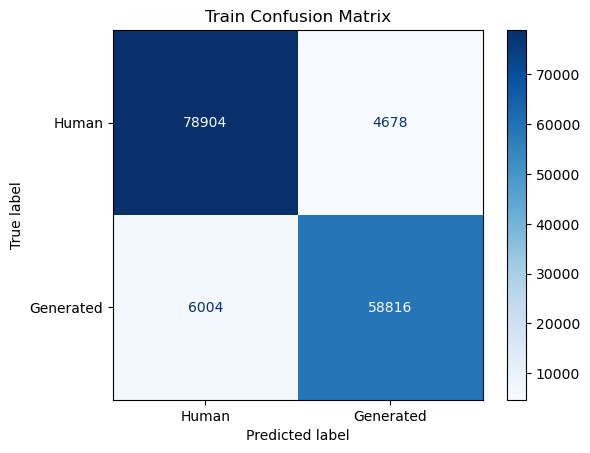

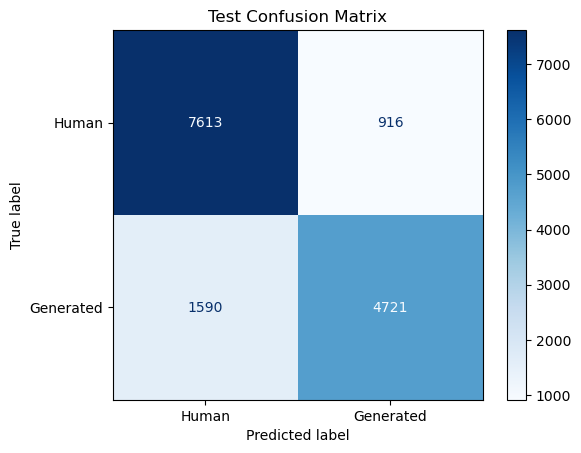

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the CNN model
model_CNN = Sequential()
model_CNN.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(train_x_tfidf.shape[1], 1)))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(1, activation='sigmoid'))  
model_CNN.compile(loss='binary_crossentropy',  
              optimizer='adam',
              metrics=['accuracy'])

# Reshape data
train_x_tfidf_reshaped = train_x_tfidf.reshape((train_x_tfidf.shape[0], train_x_tfidf.shape[1], 1))
valid_x_tfidf_reshaped = valid_x_tfidf.reshape((valid_x_tfidf.shape[0], valid_x_tfidf.shape[1], 1))
test_x_tfidf_reshaped = test_x_tfidf.reshape((test_x_tfidf.shape[0], test_x_tfidf.shape[1], 1))

# Train the model
model_CNN.fit(train_x_tfidf_reshaped, train_y, validation_data=(valid_x_tfidf_reshaped, valid_y), epochs=5)

# Train predictions
train_pred_y = (model_CNN.predict(train_x_tfidf_reshaped) > 0.5).astype("int32").flatten()

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Test predictions
test_pred_y = (model_CNN.predict(test_x_tfidf_reshaped) > 0.5).astype("int32").flatten()

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [16]:
# Save the model in HDF5 format (single .h5 file)
model_CNN.save("model_CNN.h5")

Training fold 1...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


2024-10-15 18:18:43.805088: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2374420000 exceeds 10% of free system memory.


1856/1856 - 652s - 351ms/step - accuracy: 0.7897 - loss: 0.4051
Epoch 2/3
1856/1856 - 646s - 348ms/step - accuracy: 0.8412 - loss: 0.3158
Epoch 3/3
1856/1856 - 646s - 348ms/step - accuracy: 0.8617 - loss: 0.2803
   2/3711 ━━━━━━━━━━━━━━━━━━━━ 3:48 61ms/step 

2024-10-15 18:51:10.166053: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2374420000 exceeds 10% of free system memory.


3711/3711 ━━━━━━━━━━━━━━━━━━━━ 185s 50ms/step
Train Accuracy for fold 1: 89.96470717059324%
Train F1 Score for fold 1: 0.8831227436823105
928/928 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step
Validation Accuracy for fold 1: 83.90889794818234%
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     16586
           1       0.83      0.80      0.81     13095

    accuracy                           0.84     29681
   macro avg       0.84      0.84      0.84     29681
weighted avg       0.84      0.84      0.84     29681

Training fold 2...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


2024-10-15 18:55:07.272093: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2374420000 exceeds 10% of free system memory.


1856/1856 - 632s - 340ms/step - accuracy: 0.7898 - loss: 0.4002
Epoch 2/3
1856/1856 - 632s - 341ms/step - accuracy: 0.8435 - loss: 0.3100
Epoch 3/3
1856/1856 - 632s - 341ms/step - accuracy: 0.8659 - loss: 0.2729
   2/3711 ━━━━━━━━━━━━━━━━━━━━ 3:56 64ms/step 

2024-10-15 19:26:46.451637: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2374420000 exceeds 10% of free system memory.


3711/3711 ━━━━━━━━━━━━━━━━━━━━ 180s 49ms/step
Train Accuracy for fold 2: 90.63602900918961%
Train F1 Score for fold 2: 0.8880767565717277
928/928 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step
Validation Accuracy for fold 2: 84.04366429702503%
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     16614
           1       0.85      0.77      0.81     13067

    accuracy                           0.84     29681
   macro avg       0.84      0.83      0.84     29681
weighted avg       0.84      0.84      0.84     29681

Training fold 3...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 629s - 339ms/step - accuracy: 0.7895 - loss: 0.4028
Epoch 2/3
1856/1856 - 629s - 339ms/step - accuracy: 0.8407 - loss: 0.3146
Epoch 3/3
1856/1856 - 630s - 339ms/step - accuracy: 0.8598 - loss: 0.2829
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 178s 48ms/step
Train Accuracy for fold 3: 89.015515237277%
Train F1 Score for fold 3: 0.8753047818479103
928/928 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step
Validation Accuracy for fold 3: 83.80727762803234%
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     16672
           1       0.81      0.83      0.82     13008

    accuracy                           0.84     29680
   macro avg       0.84      0.84      0.84     29680
weighted avg       0.84      0.84      0.84     29680

Training fold 4...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 628s - 339ms/step - accuracy: 0.7928 - loss: 0.3970
Epoch 2/3
1856/1856 - 628s - 339ms/step - accuracy: 0.8471 - loss: 0.3071
Epoch 3/3
1856/1856 - 628s - 339ms/step - accuracy: 0.8688 - loss: 0.2673
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 175s 47ms/step
Train Accuracy for fold 4: 90.83573389936154%
Train F1 Score for fold 4: 0.8926894701542589
928/928 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step
Validation Accuracy for fold 4: 83.78706199460918%
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     16922
           1       0.83      0.79      0.81     12758

    accuracy                           0.84     29680
   macro avg       0.84      0.83      0.83     29680
weighted avg       0.84      0.84      0.84     29680

Training fold 5...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 628s - 339ms/step - accuracy: 0.7860 - loss: 0.4081
Epoch 2/3
1856/1856 - 628s - 338ms/step - accuracy: 0.8432 - loss: 0.3131
Epoch 3/3
1856/1856 - 628s - 338ms/step - accuracy: 0.8632 - loss: 0.2769
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 174s 47ms/step
Train Accuracy for fold 5: 90.24780579841983%
Train F1 Score for fold 5: 0.8854094499099349
928/928 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step
Validation Accuracy for fold 5: 84.30929919137466%
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     16788
           1       0.84      0.79      0.81     12892

    accuracy                           0.84     29680
   macro avg       0.84      0.84      0.84     29680
weighted avg       0.84      0.84      0.84     29680


Overall Validation Confusion Matrix:

Overall Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86     83582
           1       0.83     

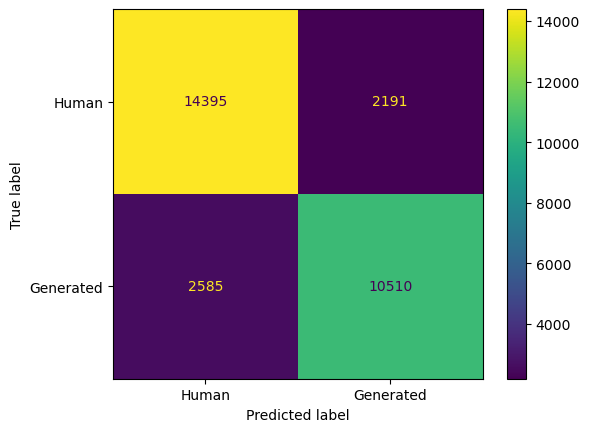

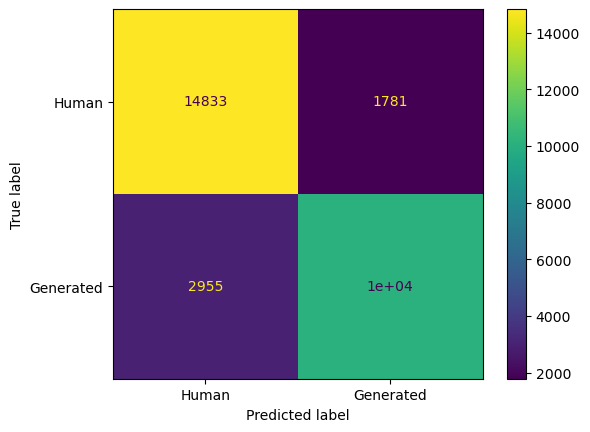

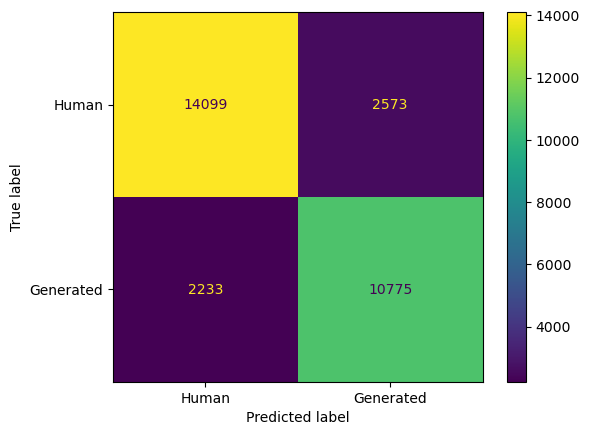

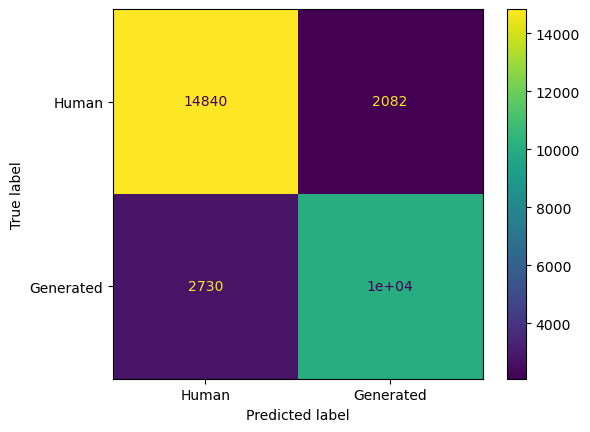

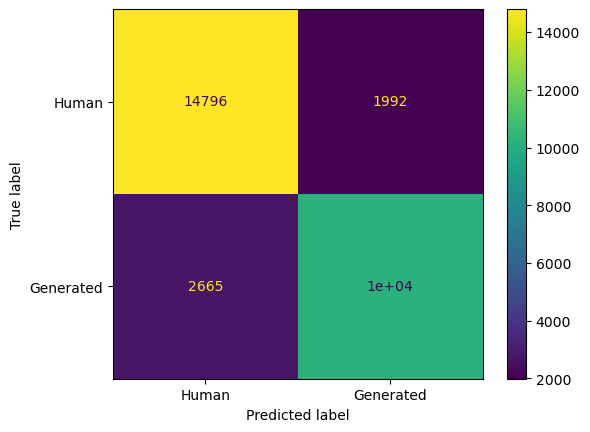

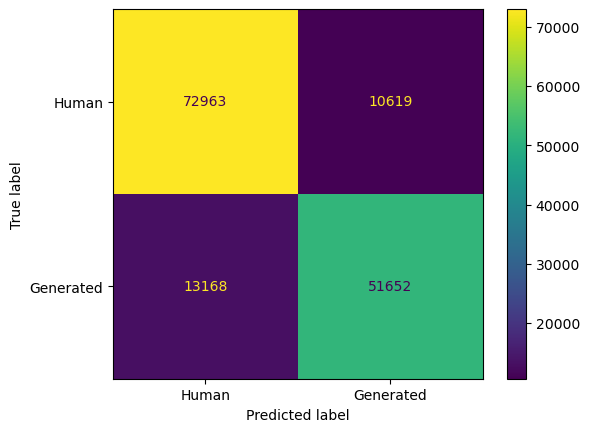

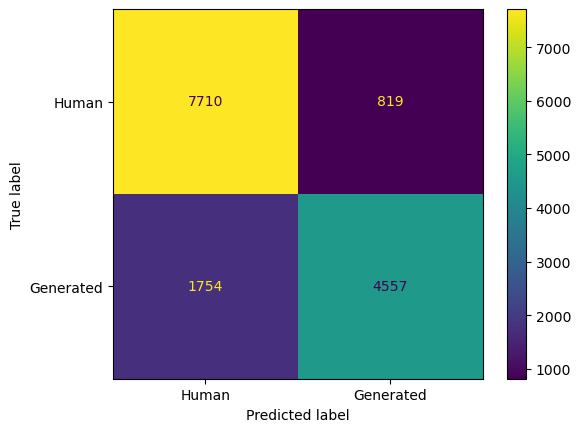

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# Function to create the CNN model
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(loss='binary_crossentropy',  
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Reshape the data
train_x_tfidf_reshaped = train_x_tfidf.reshape((train_x_tfidf.shape[0], train_x_tfidf.shape[1], 1))
valid_x_tfidf_reshaped = valid_x_tfidf.reshape((valid_x_tfidf.shape[0], valid_x_tfidf.shape[1], 1))
test_x_tfidf_reshaped = test_x_tfidf.reshape((test_x_tfidf.shape[0], test_x_tfidf.shape[1], 1))

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
train_accuracies = []
train_f1_scores = []

# **New**: Lists for storing all true labels and predictions across folds
all_val_true = []
all_val_pred = []

for train_index, val_index in kf.split(train_x_tfidf_reshaped):
    print(f"Training fold {fold_no}...")

    train_x_fold, val_x_fold = train_x_tfidf_reshaped[train_index], train_x_tfidf_reshaped[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    model = create_model(input_shape=(train_x_tfidf.shape[1], 1))
    
    # Training the model
    model.fit(train_x_fold, train_y_fold, epochs=3, batch_size=64, verbose=2)

    # **New**: Train predictions and metrics
    train_pred_y = (model.predict(train_x_fold) > 0.5).astype("int32").flatten()
    
    # Train accuracy and F1 score
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1 = f1_score(train_y_fold, train_pred_y)
    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1}")
    
    # Save train metrics for each fold
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)

    # Validation prediction and metrics
    val_pred_y = (model.predict(val_x_fold) > 0.5).astype("int32").flatten()
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    
    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot()

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    print(val_report)

    # Accuracy per fold
    accuracy_per_fold.append(val_accuracy * 100)
    
    # **New**: Add true and predicted values to the overall list
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    fold_no += 1

# **New**: After K-Fold, print combined validation confusion matrix and classification report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Combined Validation Accuracy
combined_validation_accuracy = np.mean(accuracy_per_fold)
print(f"\nCombined Validation Accuracy across folds: {combined_validation_accuracy}%")

# **New**: Overall train metrics
print("\nOverall Train Accuracy: ", np.mean(train_accuracies) * 100)
print("Overall Train F1 Score: ", np.mean(train_f1_scores))

# Test set evaluation after K-Fold Cross Validation
test_pred_y = (model.predict(test_x_tfidf_reshaped) > 0.5).astype("int32").flatten()
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)
print(f"\nTest Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

print("\nTest Classification Report:\n", classification_report(test_y, test_pred_y))


In [10]:
# Save the model in HDF5 format (single .h5 file)
model.save("model_CNN1.h5")

NameError: name 'model_CNN' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the LSTM model (though it doesn't use LSTM layers)
model_LSTM = Sequential()
model_LSTM.add(Dense(128, activation='relu', input_shape=(train_x_tfidf.shape[1],))) 
model_LSTM.add(Dropout(0.5))  
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(1, activation='sigmoid'))  
model_LSTM.compile(loss='binary_crossentropy',  
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model_LSTM.fit(train_dataset, validation_data=valid_dataset, epochs=5)

# Train predictions
train_pred_y = (model_LSTM.predict(train_dataset) > 0.5).astype("int32").flatten()

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = (model_LSTM.predict(valid_dataset) > 0.5).astype("int32").flatten() 
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = (model_LSTM.predict(test_dataset) > 0.5).astype("int32").flatten()  
print("Test Accuracy: ", accuracy_score(test_y, test_pred_y))

# Test F1 Score
test_f1_score = f1_score(test_y, test_pred_y)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
model_LSTM.save("model_LSTM.h5")

Training fold 1...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 10s - 6ms/step - accuracy: 0.7812 - loss: 0.4222
Epoch 2/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8336 - loss: 0.3366
Epoch 3/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8552 - loss: 0.2957
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Train Accuracy for fold 1: 89.42815508629477%
Train F1 Score for fold 1: 0.8720239005638657
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation Accuracy for fold 1: 83.29908021966915%
Validation F1 Score for fold 1: 0.8005632669483002
Training fold 2...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 10s - 6ms/step - accuracy: 0.7820 - loss: 0.4213
Epoch 2/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8326 - loss: 0.3349
Epoch 3/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8532 - loss: 0.2967
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Train Accuracy for fold 2: 89.56713639541447%
Train F1 Score for fold 2: 0.879363409693003
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation Accuracy for fold 2: 82.93521107779388%
Validation F1 Score for fold 2: 0.8047341840471877
Training fold 3...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 10s - 5ms/step - accuracy: 0.7828 - loss: 0.4190
Epoch 2/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8333 - loss: 0.3329
Epoch 3/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8557 - loss: 0.2942
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Train Accuracy for fold 3: 89.30105624905241%
Train F1 Score for fold 3: 0.8710090177918596
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation Accuracy for fold 3: 83.46698113207547%
Validation F1 Score for fold 3: 0.8010379921339659
Training fold 4...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 10s - 6ms/step - accuracy: 0.7838 - loss: 0.4195
Epoch 2/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8348 - loss: 0.3312
Epoch 3/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8556 - loss: 0.2933
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Train Accuracy for fold 4: 89.68177759808628%
Train F1 Score for fold 4: 0.8759418293769748
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation Accuracy for fold 4: 83.19743935309974%
Validation F1 Score for fold 4: 0.7932849740932643
Training fold 5...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 10s - 6ms/step - accuracy: 0.7816 - loss: 0.4208
Epoch 2/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8327 - loss: 0.3322
Epoch 3/3
1856/1856 - 10s - 5ms/step - accuracy: 0.8549 - loss: 0.2943
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Train Accuracy for fold 5: 89.51668603965567%
Train F1 Score for fold 5: 0.8769063396301058
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation Accuracy for fold 5: 83.36253369272238%
Validation F1 Score for fold 5: 0.8025747641132257

Average Train Accuracy across folds: 89.49896227813642%
Average Train F1 Score across folds: 0.8750979319575771
Average Validation Accuracy across folds: 83.2522472742955%
Average Validation F1 Score across folds: 0.8005200892498836

Overall Validation Confusion Matrix:

Overall Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86     83582
           1       0.83      0.77      0.80     64820

    accuracy                 

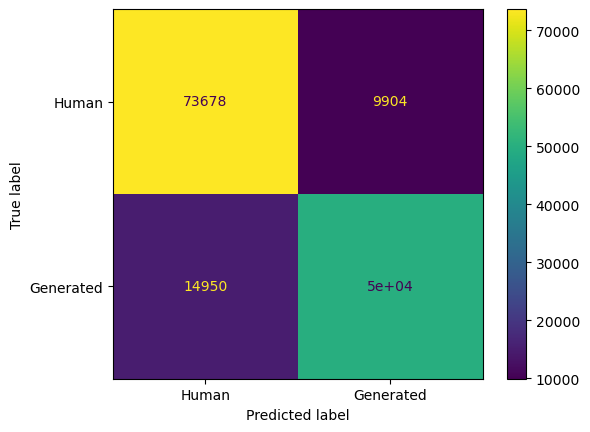

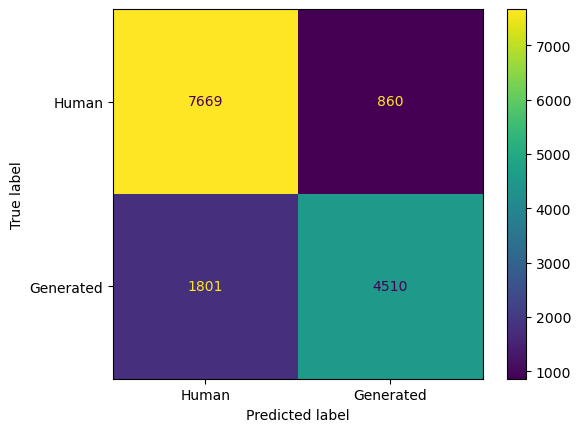

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# Function to create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))  # Input layer
    model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
    model.add(Dense(64, activation='relu'))  # Hidden layer
    model.add(Dropout(0.5))  # Dropout layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Reshape the data
train_x_tfidf_reshaped = train_x_tfidf.reshape((train_x_tfidf.shape[0], train_x_tfidf.shape[1]))
valid_x_tfidf_reshaped = valid_x_tfidf.reshape((valid_x_tfidf.shape[0], valid_x_tfidf.shape[1]))
test_x_tfidf_reshaped = test_x_tfidf.reshape((test_x_tfidf.shape[0], test_x_tfidf.shape[1]))

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []

# Add lists for storing all true labels and predictions
all_val_true = []
all_val_pred = []
all_train_true = []
all_train_pred = []

for train_index, val_index in kf.split(train_x_tfidf_reshaped):
    print(f"Training fold {fold_no}...")

    train_x_fold, val_x_fold = train_x_tfidf_reshaped[train_index], train_x_tfidf_reshaped[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    model = create_lstm_model(input_shape=(train_x_tfidf.shape[1],))

    # Training the model
    model.fit(train_x_fold, train_y_fold, epochs=3, batch_size=64, verbose=2)

    # Training prediction and metrics
    train_pred_y = (model.predict(train_x_fold) > 0.5).astype("int32").flatten()
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1 = f1_score(train_y_fold, train_pred_y)

    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1}")

    # Extend the lists with the true labels and predictions from this fold for training
    all_train_true.extend(train_y_fold)
    all_train_pred.extend(train_pred_y)

    # Validation prediction and metrics
    val_pred_y = (model.predict(val_x_fold) > 0.5).astype("int32").flatten()
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1 = f1_score(val_y_fold, val_pred_y)

    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1}")

    # Extend the lists with the true labels and predictions from this fold for validation
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    fold_no += 1

# Calculate and print the average accuracy across folds for training and validation
average_train_accuracy = accuracy_score(all_train_true, all_train_pred)
average_train_f1 = f1_score(all_train_true, all_train_pred)

average_val_accuracy = accuracy_score(all_val_true, all_val_pred)
average_val_f1 = f1_score(all_val_true, all_val_pred)

print(f"\nAverage Train Accuracy across folds: {average_train_accuracy * 100}%")
print(f"Average Train F1 Score across folds: {average_train_f1}")
print(f"Average Validation Accuracy across folds: {average_val_accuracy * 100}%")
print(f"Average Validation F1 Score across folds: {average_val_f1}")

# Overall Validation Confusion Matrix and Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = (model.predict(test_x_tfidf_reshaped) > 0.5).astype("int32").flatten()
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [12]:
model.save("model_LSTM1.h5")

NameError: name 'model_LSTM' is not defined

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# RNN Model definition
model_RNN = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_x_tfidf.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

# Compile the model
model_RNN.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

# Training the model
model_RNN.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

# Evaluate the model on the test set
test_loss, test_acc = model_RNN.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# Make predictions on train data
train_pred_prob = model_RNN.predict(train_x_tfidf)
train_pred_y = (train_pred_prob > 0.5).astype(int).flatten()

# Calculate Train Accuracy and Train F1 Score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Confusion Matrix for Train Data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Make predictions on test data
test_pred_prob = model_RNN.predict(test_x_tfidf)
test_pred_y = (test_pred_prob > 0.5).astype(int).flatten()

# Calculate Test Accuracy and Test F1 Score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion Matrix for Test Data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test Data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
model_RNN.save("model_RNN.h5")

Training fold 1...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 27s - 15ms/step - accuracy: 0.7809 - loss: 0.4266 - val_accuracy: 0.8100 - val_loss: 0.3688
Epoch 2/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8509 - loss: 0.3055 - val_accuracy: 0.8337 - val_loss: 0.3231
Epoch 3/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8906 - loss: 0.2329 - val_accuracy: 0.8263 - val_loss: 0.3423
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Train Accuracy for fold 1: 89.80551039832886%
Train F1 Score for fold 1: 0.8828034975937098
928/928 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Validation Accuracy for fold 1: 83.36983255281156%
Validation F1 Score for fold 1: 0.8105618667485416
Training fold 2...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 27s - 15ms/step - accuracy: 0.7801 - loss: 0.4277 - val_accuracy: 0.8041 - val_loss: 0.3759
Epoch 2/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8489 - loss: 0.3063 - val_accuracy: 0.8271 - val_loss: 0.3334
Epoch 3/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8906 - loss: 0.2328 - val_accuracy: 0.8234 - val_loss: 0.3488
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
Train Accuracy for fold 2: 89.1316616268394%
Train F1 Score for fold 2: 0.880502329199737
928/928 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Validation Accuracy for fold 2: 82.7061082847613%
Validation F1 Score for fold 2: 0.8123560592213489
Training fold 3...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 27s - 15ms/step - accuracy: 0.7786 - loss: 0.4295 - val_accuracy: 0.8029 - val_loss: 0.3831
Epoch 2/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8470 - loss: 0.3096 - val_accuracy: 0.8331 - val_loss: 0.3306
Epoch 3/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8854 - loss: 0.2387 - val_accuracy: 0.8289 - val_loss: 0.3449
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Train Accuracy for fold 3: 88.87400818719361%
Train F1 Score for fold 3: 0.8635758032698843
928/928 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Validation Accuracy for fold 3: 83.31199460916442%
Validation F1 Score for fold 3: 0.7954066669420463
Training fold 4...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 27s - 15ms/step - accuracy: 0.7826 - loss: 0.4259 - val_accuracy: 0.8154 - val_loss: 0.3627
Epoch 2/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8490 - loss: 0.3068 - val_accuracy: 0.8247 - val_loss: 0.3480
Epoch 3/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8904 - loss: 0.2304 - val_accuracy: 0.8269 - val_loss: 0.3492
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Train Accuracy for fold 4: 88.18921514125437%
Train F1 Score for fold 4: 0.8521946283256736
928/928 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Validation Accuracy for fold 4: 82.46967654986523%
Validation F1 Score for fold 4: 0.7723872435364627
Training fold 5...


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1856/1856 - 27s - 15ms/step - accuracy: 0.7816 - loss: 0.4234 - val_accuracy: 0.8139 - val_loss: 0.3670
Epoch 2/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8500 - loss: 0.3043 - val_accuracy: 0.8335 - val_loss: 0.3311
Epoch 3/3
1856/1856 - 25s - 14ms/step - accuracy: 0.8871 - loss: 0.2352 - val_accuracy: 0.8309 - val_loss: 0.3469
3711/3711 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Train Accuracy for fold 5: 89.40802884048449%
Train F1 Score for fold 5: 0.8752962643421692
928/928 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Validation Accuracy for fold 5: 83.35242587601078%
Validation F1 Score for fold 5: 0.8018765788523998
Average accuracy across folds: nan%


/home/yadagiri/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yadagiri/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Overall Train Accuracy: 89.08168353526233%
Overall Train F1 Score: 0.8713480938032229

Overall Validation Confusion Matrix:

Overall Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     83582
           1       0.83      0.77      0.80     64820

    accuracy                           0.83    148402
   macro avg       0.83      0.82      0.83    148402
weighted avg       0.83      0.83      0.83    148402

464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 82.06873315363882%
Test F1 Score: 0.7735126393735637
Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      8529
           1       0.84      0.72      0.77      6311

    accuracy                           0.82     14840
   macro avg       0.82      0.81      0.81     14840
weighted avg       0.82      0.82      0.82     14840



Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,205,317 (31.30 MB)

 Trainable params: 2,735,105 (10.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,470,212 (20.87 MB)

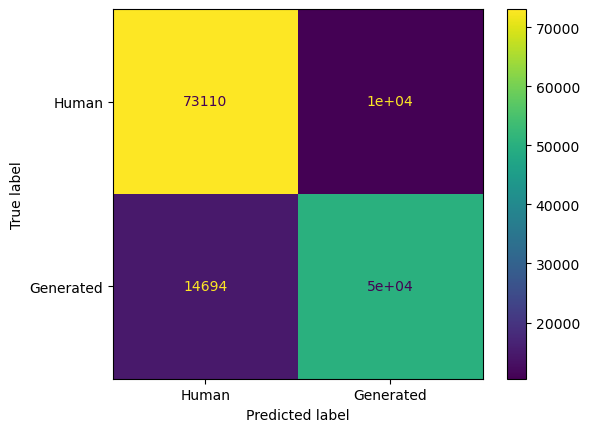

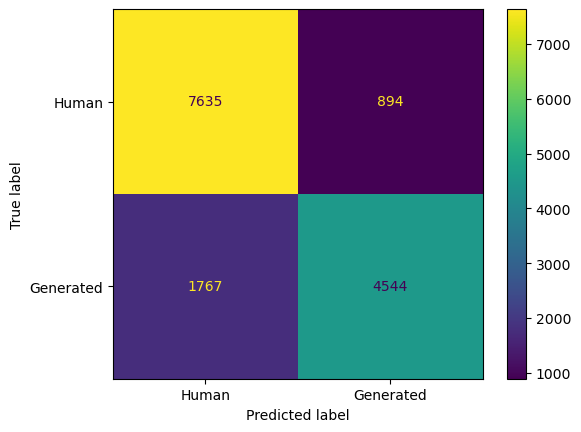

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# Function to create the RNN model
def create_rnn_model(input_shape):
    model = Sequential([
        Dense(512, activation='relu', input_shape=input_shape),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(1e-4),
        metrics=['accuracy']
    )
    
    return model

# Reshape the data for the RNN model
train_x_tfidf_reshaped = train_x_tfidf.reshape((train_x_tfidf.shape[0], train_x_tfidf.shape[1]))
valid_x_tfidf_reshaped = valid_x_tfidf.reshape((valid_x_tfidf.shape[0], valid_x_tfidf.shape[1]))
test_x_tfidf_reshaped = test_x_tfidf.reshape((test_x_tfidf.shape[0], test_x_tfidf.shape[1]))

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []

# Add lists for storing all true labels and predictions
all_val_true = []
all_val_pred = []
all_train_true = []
all_train_pred = []

for train_index, val_index in kf.split(train_x_tfidf_reshaped):
    print(f"Training fold {fold_no}...")

    train_x_fold, val_x_fold = train_x_tfidf_reshaped[train_index], train_x_tfidf_reshaped[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create RNN model for each fold
    model = create_rnn_model(input_shape=(train_x_tfidf.shape[1],))

    # Train the model
    model.fit(train_x_fold, train_y_fold, epochs=3, batch_size=64, verbose=2, 
              validation_data=(val_x_fold, val_y_fold), 
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    # Train predictions and metrics
    train_pred_y = (model.predict(train_x_fold) > 0.5).astype("int32").flatten()
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1_score = f1_score(train_y_fold, train_pred_y)

    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1_score}")

    # Validation predictions and metrics
    val_pred_y = (model.predict(val_x_fold) > 0.5).astype("int32").flatten()
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1_score = f1_score(val_y_fold, val_pred_y)

    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1_score}")

    # Extend the lists with the true labels and predictions from this fold
    all_train_true.extend(train_y_fold)
    all_train_pred.extend(train_pred_y)
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    fold_no += 1

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracy_per_fold)
print(f"Average accuracy across folds: {average_accuracy * 100}%")

# Overall Train Accuracy and F1 Score
train_accuracy = accuracy_score(all_train_true, all_train_pred)
train_f1_score = f1_score(all_train_true, all_train_pred)

print(f"\nOverall Train Accuracy: {train_accuracy * 100}%")
print(f"Overall Train F1 Score: {train_f1_score}")

# Overall Validation Confusion Matrix and Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_prob = model.predict(test_x_tfidf_reshaped)
test_pred_y = (test_pred_prob > 0.5).astype(int).flatten()
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)

# Final model summary
model.summary()


In [14]:
model.save("model_RNN1.h5")

NameError: name 'model_rnn' is not defined

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = svm_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions (Optional)
valid_pred_y = svm_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = svm_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [16]:

!pip install joblib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [17]:
import joblib
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

Training fold 1...
Train Accuracy for fold 1: 82.86486805198743%
Train F1 Score for fold 1: 0.8009666467727891
Validation Accuracy for fold 1: 80.7452579091001%
Validation F1 Score for fold 1: 0.7798112117125795
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     16586
           1       0.79      0.77      0.78     13095

    accuracy                           0.81     29681
   macro avg       0.81      0.80      0.80     29681
weighted avg       0.81      0.81      0.81     29681

Training fold 2...
Train Accuracy for fold 2: 82.85476032041508%
Train F1 Score for fold 2: 0.8010088864122943
Validation Accuracy for fold 2: 80.67113641723661%
Validation F1 Score for fold 2: 0.7782116209842657
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     16614
           1       0.79      0.77      0.78     13067

    accuracy                           0.81     29681
   macro avg       0.80      0

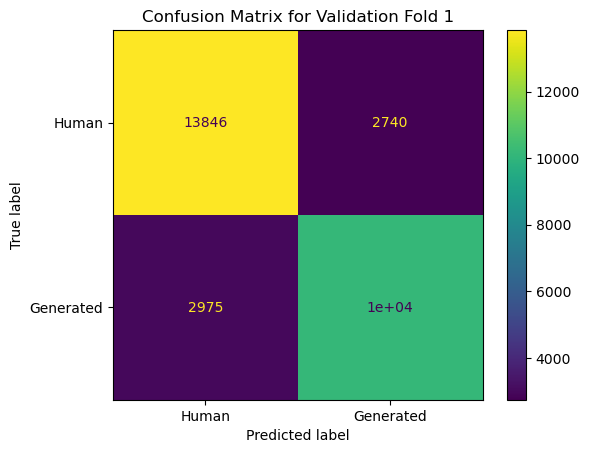

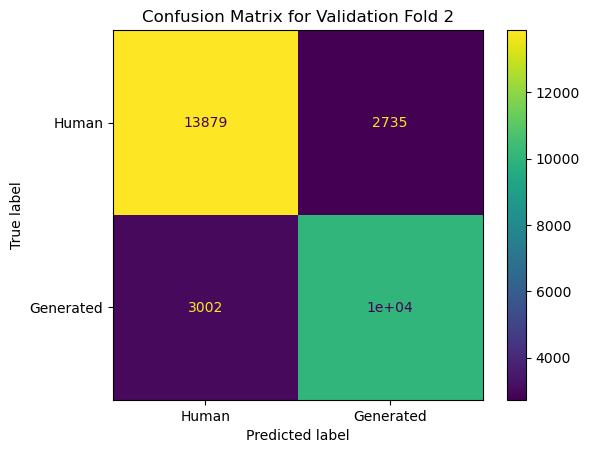

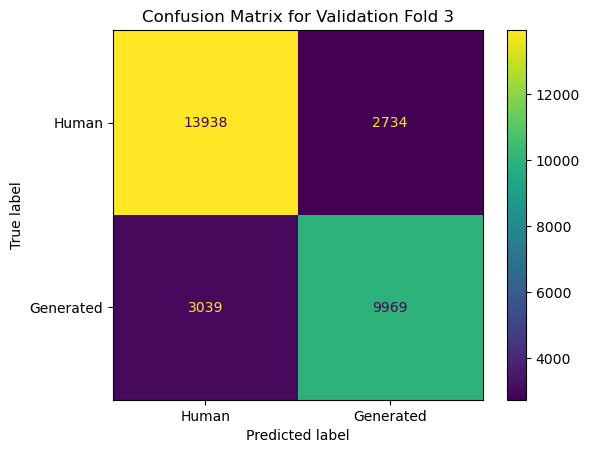

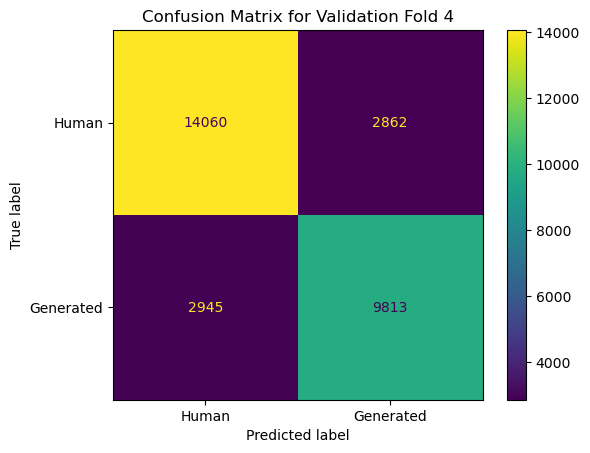

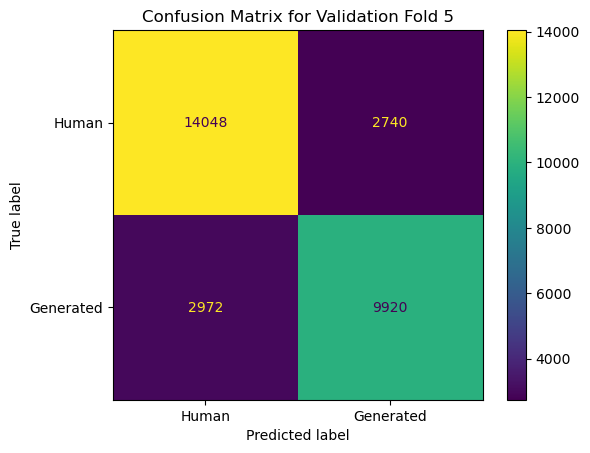

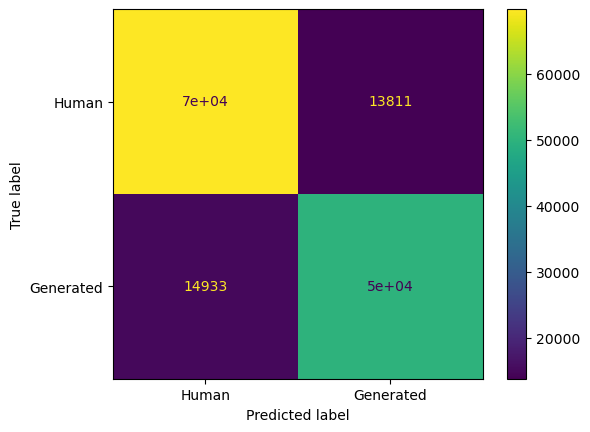

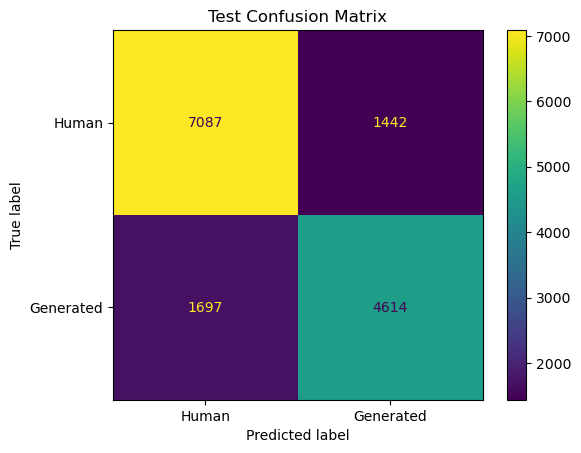

In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
f1_per_fold = []

# Add lists for storing all true labels and predictions
all_val_true = []
all_val_pred = []

# Add lists for storing confusion matrices and reports
confusion_matrices = []
validation_reports = []

# Begin K-Fold training
for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split data for this fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create and train the SVM model for this fold
    svm_model = LinearSVC()
    svm_model.fit(train_x_fold, train_y_fold)

    # Training predictions and metrics
    train_pred_y = svm_model.predict(train_x_fold)
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1_score = f1_score(train_y_fold, train_pred_y)

    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1_score}")

    # Validation predictions and metrics
    val_pred_y = svm_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1_score = f1_score(val_y_fold, val_pred_y)
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1_score}")

    # Extend the lists with the true labels and predictions from this fold
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot()
    cmd.ax_.set_title(f"Confusion Matrix for Validation Fold {fold_no}")

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(val_report)

    # Accuracy per fold
    accuracy_per_fold.append(val_accuracy * 100)
    f1_per_fold.append(val_f1_score)

    fold_no += 1

# Calculate and print the average accuracy and F1 score across folds
average_accuracy = np.mean(accuracy_per_fold)
average_f1_score = np.mean(f1_per_fold)
print(f"\nAverage Accuracy across folds: {average_accuracy}%")
print(f"Average F1 Score across folds: {average_f1_score}")

# Overall Validation Confusion Matrix and Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = svm_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print(f"\nTest Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()
cmd_test.ax_.set_title("Test Confusion Matrix")

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [18]:
!pip install joblib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [19]:
import joblib
joblib.dump(svm_model, 'svm_model1.pkl')

['svm_model1.pkl']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Create and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = knn_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = knn_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = knn_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
joblib.dump(knn_model, 'knn_model.pkl')

Training fold 1...
Train Accuracy for fold 1: 71.13147631842723%
Train F1 Score for fold 1: 0.5733633749517633
Validation Accuracy for fold 1: 63.437889558977126%
Validation F1 Score for fold 1: 0.445817587580431
              precision    recall  f1-score   support

           0       0.62      0.87      0.73     16586
           1       0.67      0.33      0.45     13095

    accuracy                           0.63     29681
   macro avg       0.65      0.60      0.59     29681
weighted avg       0.65      0.63      0.60     29681

Training fold 2...
Train Accuracy for fold 2: 71.705932396122%
Train F1 Score for fold 2: 0.5932061762034514
Validation Accuracy for fold 2: 63.613085812472626%
Validation F1 Score for fold 2: 0.456795091037119
              precision    recall  f1-score   support

           0       0.63      0.86      0.73     16614
           1       0.67      0.35      0.46     13067

    accuracy                           0.64     29681
   macro avg       0.65      0.

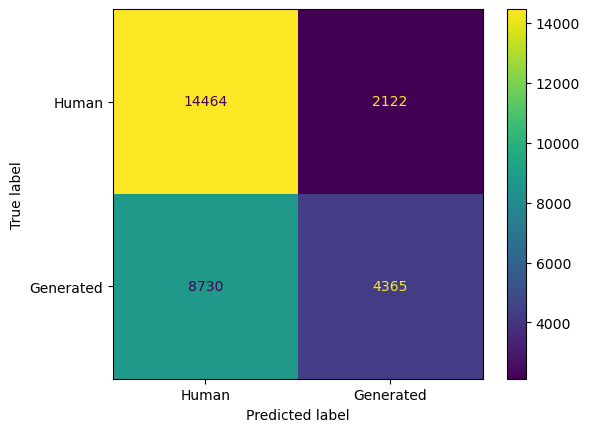

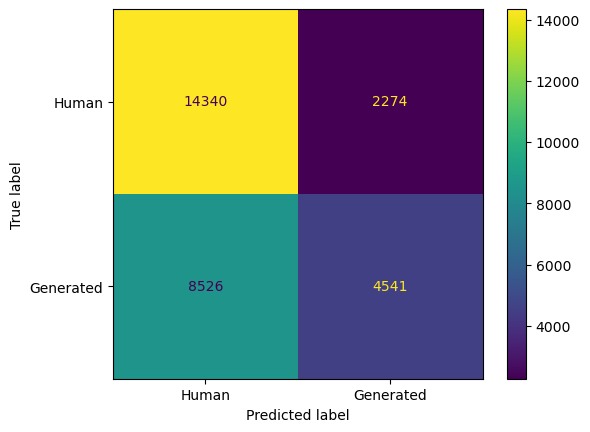

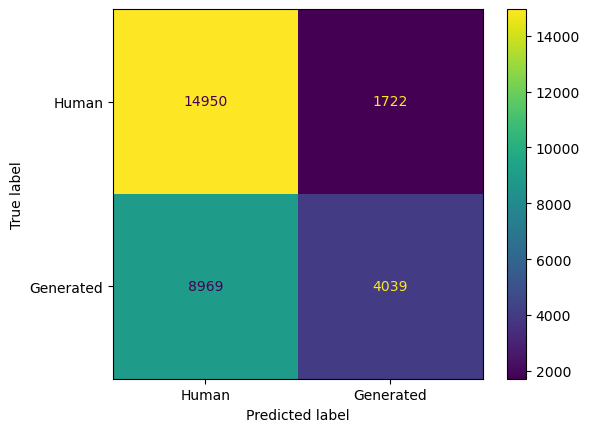

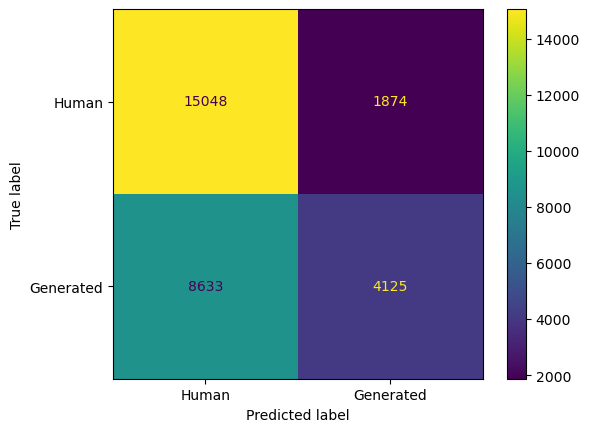

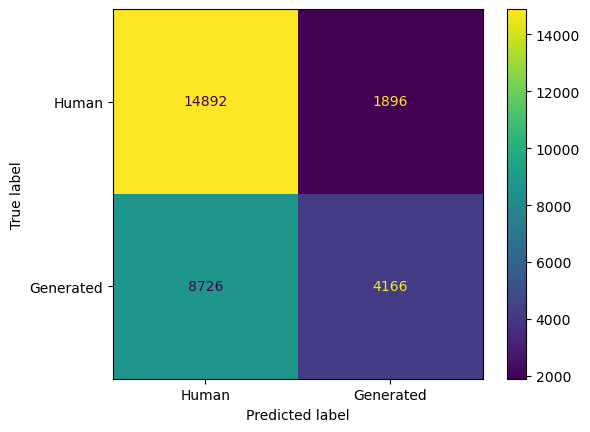

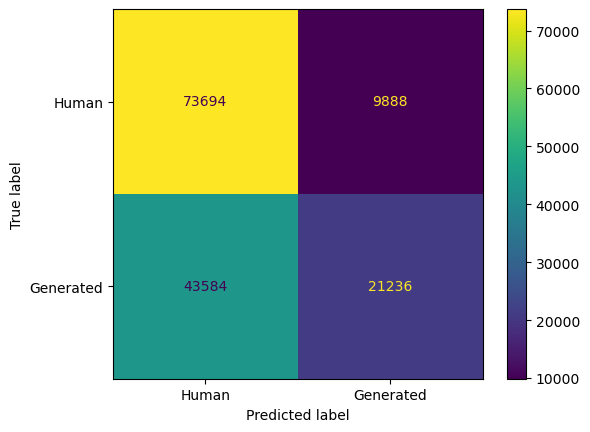

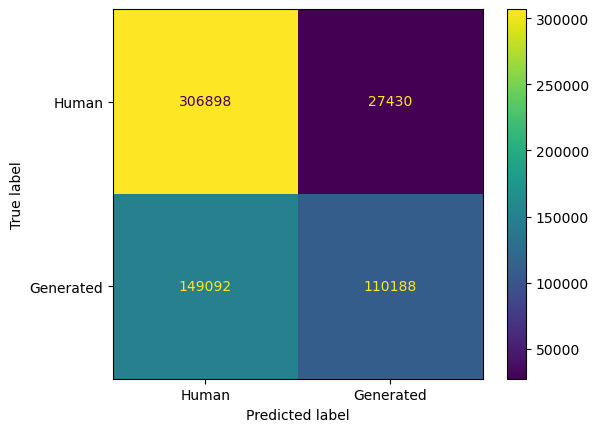

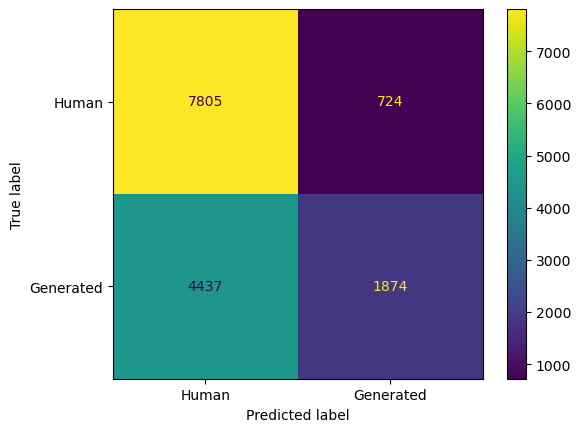

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []

# Add lists for storing all true labels and predictions
all_val_true = []
all_val_pred = []
all_train_true = []
all_train_pred = []

# Begin K-Fold training
for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split data for this fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create and train the KNN model for this fold
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(train_x_fold, train_y_fold)

    # Train predictions and metrics
    train_pred_y = knn_model.predict(train_x_fold)
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1_score = f1_score(train_y_fold, train_pred_y)
    
    # Extend the lists with the true labels and predictions from this fold (train set)
    all_train_true.extend(train_y_fold)
    all_train_pred.extend(train_pred_y)

    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1_score}")

    # Validation predictions and metrics
    val_pred_y = knn_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1_score = f1_score(val_y_fold, val_pred_y)

    # Extend the lists with the true labels and predictions from this fold (validation set)
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1_score}")

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot()

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(val_report)

    # Accuracy per fold
    accuracy_per_fold.append(val_accuracy * 100)
    
    fold_no += 1

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracy_per_fold)
print(f"Average accuracy across folds: {average_accuracy}%")

# Overall Validation Confusion Matrix and Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Train set Confusion Matrix and Report
train_cm = confusion_matrix(all_train_true, all_train_pred)
cmd_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Human', 'Generated'])
cmd_train.plot()
print("\nOverall Train Classification Report:\n", classification_report(all_train_true, all_train_pred))

# Test set evaluation after K-Fold Cross Validation
test_pred_y = knn_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)
print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [21]:
joblib.dump(knn_model, 'knn_model1.pkl')

['knn_model1.pkl']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on training data
dt_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = dt_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = dt_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = dt_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
joblib.dump(dt_model, 'dt_model.pkl')

Training fold 1...
Train Accuracy for fold 1: 99.77257603962231%
Train F1 Score for fold 1: 0.997383467390251
Validation Accuracy for fold 1: 73.80479094370136%
Validation F1 Score for fold 1: 0.6953489283335292
Validation Classification Report for fold 1:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     16586
           1       0.71      0.68      0.70     13095

    accuracy                           0.74     29681
   macro avg       0.73      0.73      0.73     29681
weighted avg       0.74      0.74      0.74     29681

Training fold 2...
Train Accuracy for fold 2: 99.79194919180263%
Train F1 Score for fold 2: 0.9976081420008328
Validation Accuracy for fold 2: 73.84859000707523%
Validation F1 Score for fold 2: 0.6992871532620487
Validation Classification Report for fold 2:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     16614
           1       0.71      0.69      0.70     1

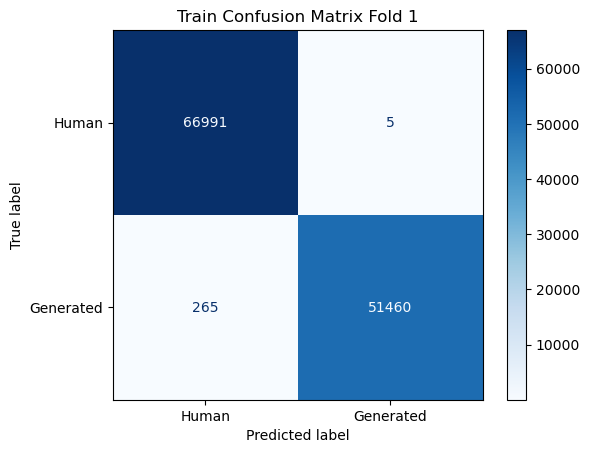

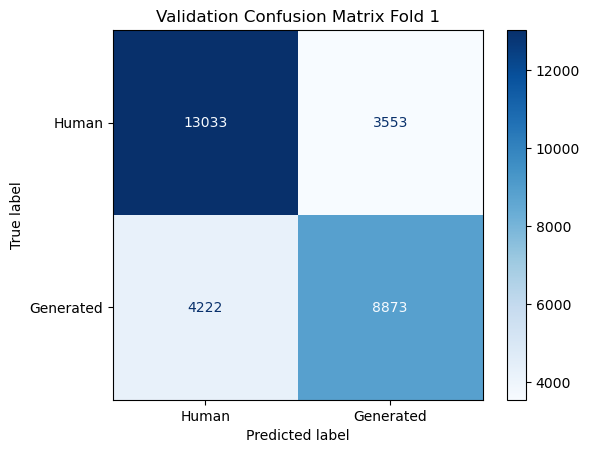

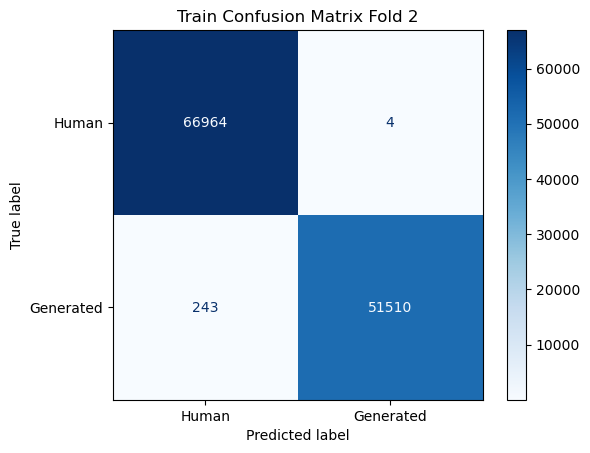

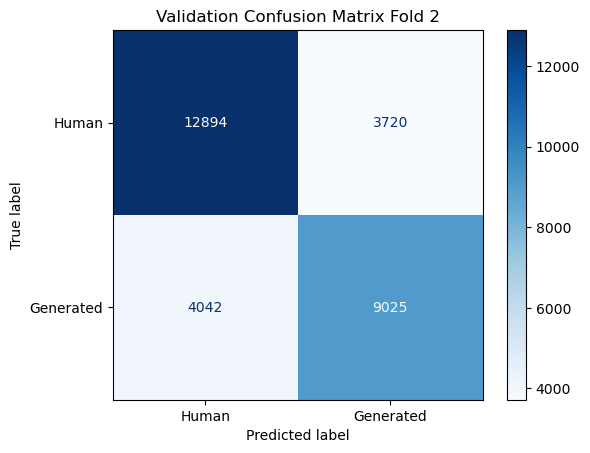

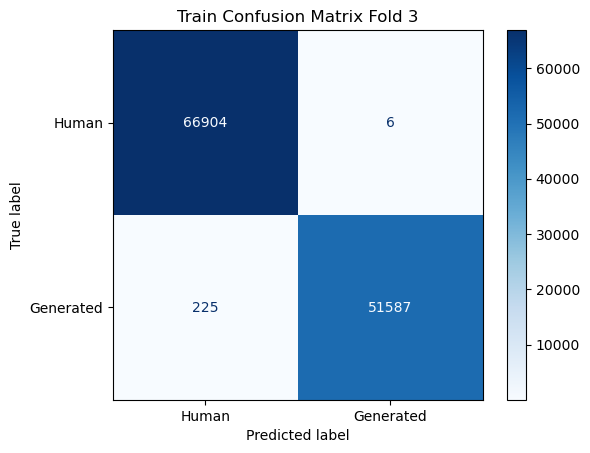

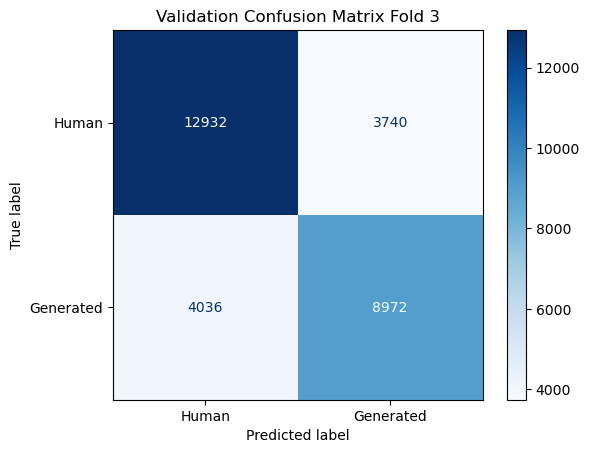

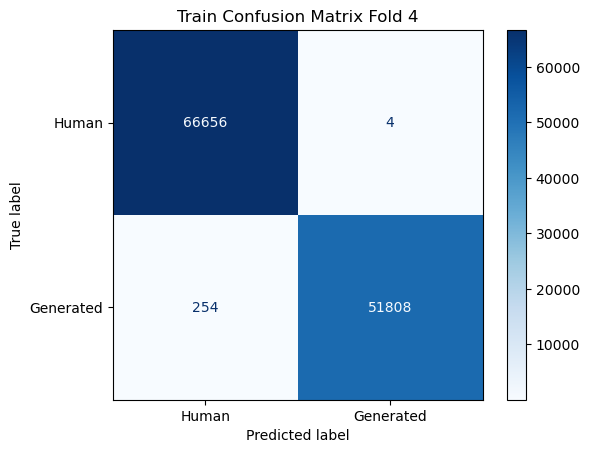

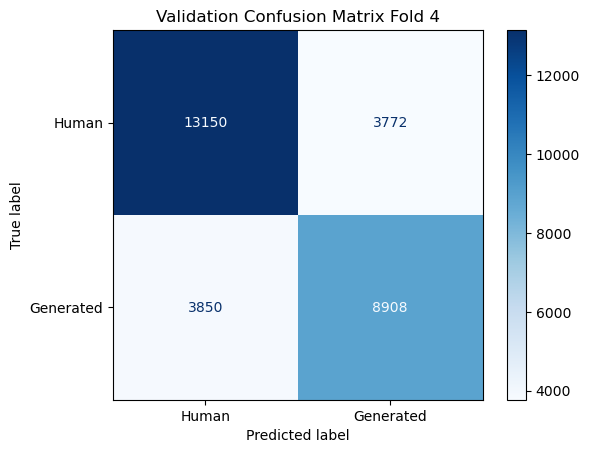

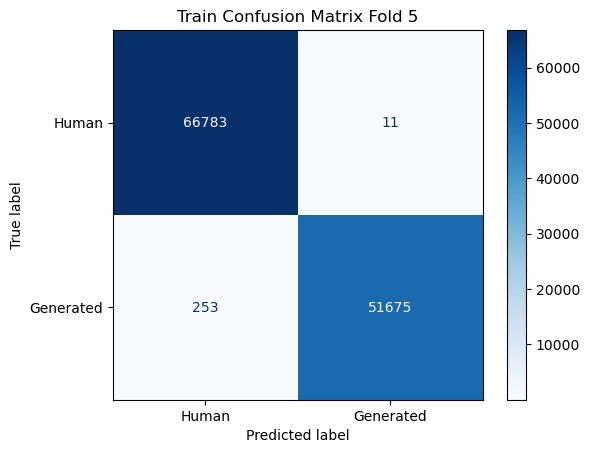

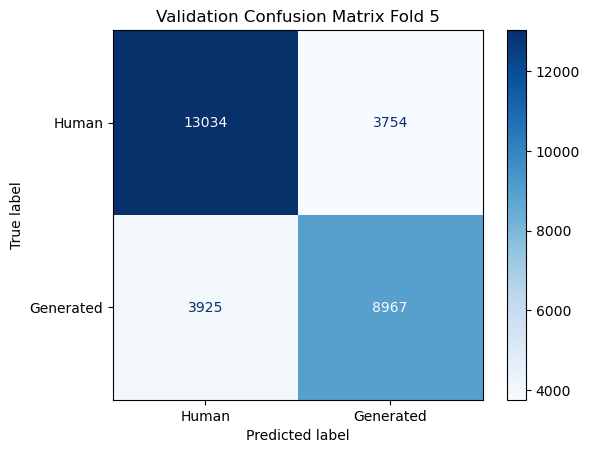

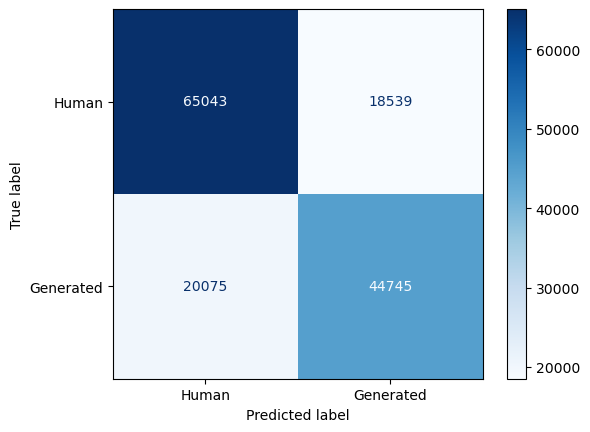

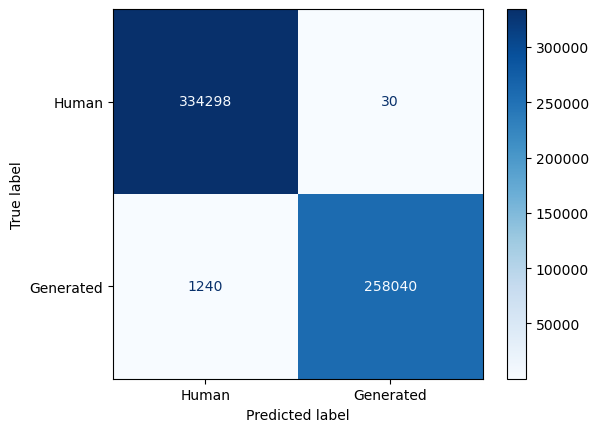

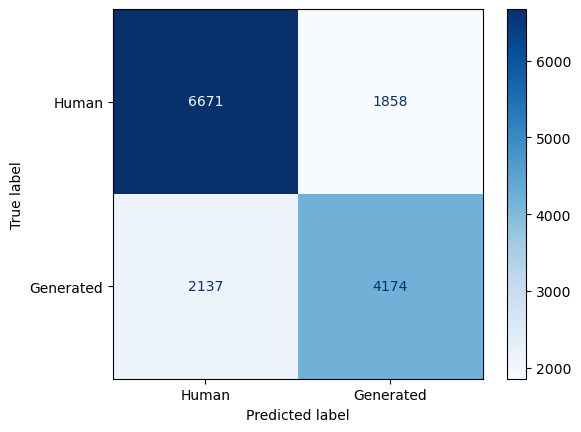

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
f1_per_fold = []

# Add lists for storing all true labels and predictions
all_val_true = []
all_val_pred = []

# Add lists for storing train true labels and predictions
all_train_true = []
all_train_pred = []

# Begin K-Fold training
for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split data for this fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create and train the Decision Tree model for this fold
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(train_x_fold, train_y_fold)

    # Training predictions and metrics
    train_pred_y = dt_model.predict(train_x_fold)
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1 = f1_score(train_y_fold, train_pred_y)

    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1}")

    # Extend the lists with the true labels and predictions from this fold (train)
    all_train_true.extend(train_y_fold)
    all_train_pred.extend(train_pred_y)

    # Validation predictions and metrics
    val_pred_y = dt_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1 = f1_score(val_y_fold, val_pred_y)

    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1}")

    # Extend the lists with the true labels and predictions from this fold (validation)
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for training
    train_cm = confusion_matrix(train_y_fold, train_pred_y)
    train_cmd = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Human', 'Generated'])
    train_cmd.plot(cmap='Blues', values_format='d')
    train_cmd.ax_.set_title(f"Train Confusion Matrix Fold {fold_no}")

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot(cmap='Blues', values_format='d')
    cmd.ax_.set_title(f"Validation Confusion Matrix Fold {fold_no}")

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(f"Validation Classification Report for fold {fold_no}:\n{val_report}")

    # Accuracy and F1 per fold
    accuracy_per_fold.append(val_accuracy * 100)
    f1_per_fold.append(val_f1)
    
    fold_no += 1

# Calculate and print the average accuracy and F1 score across folds
average_accuracy = np.mean(accuracy_per_fold)
average_f1 = np.mean(f1_per_fold)

print(f"Average accuracy across folds: {average_accuracy}%")
print(f"Average F1 Score across folds: {average_f1}")

# Overall Validation Confusion Matrix and Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot(cmap='Blues', values_format='d')

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Overall Train Confusion Matrix
overall_train_cm = confusion_matrix(all_train_true, all_train_pred)
print("\nOverall Train Confusion Matrix:")
cmd_train_overall = ConfusionMatrixDisplay(confusion_matrix=overall_train_cm, display_labels=['Human', 'Generated'])
cmd_train_overall.plot(cmap='Blues', values_format='d')

# Test set evaluation after K-Fold Cross Validation
test_pred_y = dt_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot(cmap='Blues', values_format='d')

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [23]:
joblib.dump(dt_model, 'dt_model1.pkl')

['dt_model1.pkl']

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize AdaBoost model with a weak classifier (Decision Tree Stump)
dt_stump = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(estimator=dt_stump, n_estimators=100, algorithm='SAMME', random_state=42)

# Train the model
ada_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = ada_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions (already in your code)
valid_pred_y = ada_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = ada_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
joblib.dump(ada_model, 'ada_model.pkl')

Training fold 1...
Validation Accuracy for fold 1: 72.56494053434858%
Validation F1 Score for fold 1: 0.6475654620212076
              precision    recall  f1-score   support

           0       0.71      0.85      0.78     16586
           1       0.75      0.57      0.65     13095

    accuracy                           0.73     29681
   macro avg       0.73      0.71      0.71     29681
weighted avg       0.73      0.73      0.72     29681

Training fold 2...
Validation Accuracy for fold 2: 73.20844985007243%
Validation F1 Score for fold 2: 0.6821488528259653
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     16614
           1       0.71      0.65      0.68     13067

    accuracy                           0.73     29681
   macro avg       0.73      0.72      0.73     29681
weighted avg       0.73      0.73      0.73     29681

Training fold 3...
Validation Accuracy for fold 3: 72.93463611859838%
Validation F1 Score for fold 3: 0.

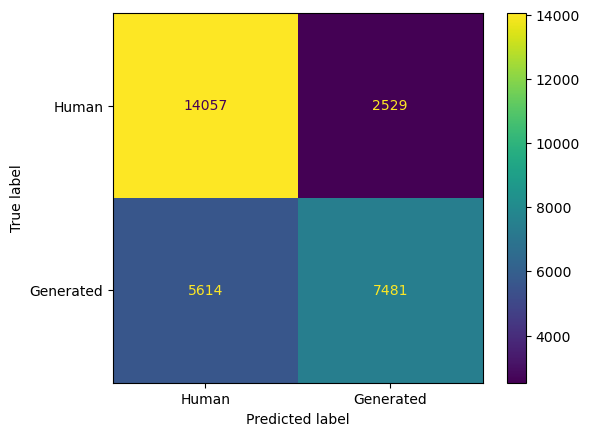

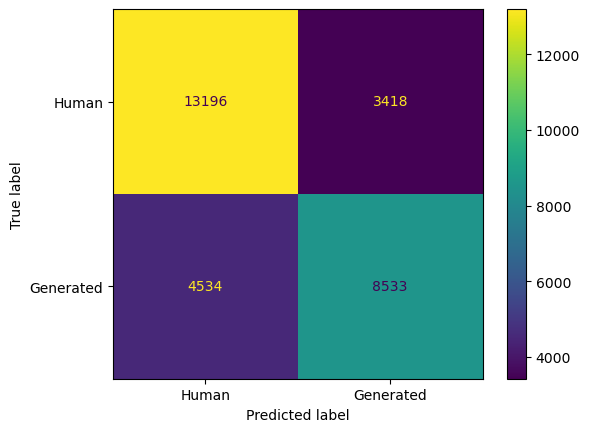

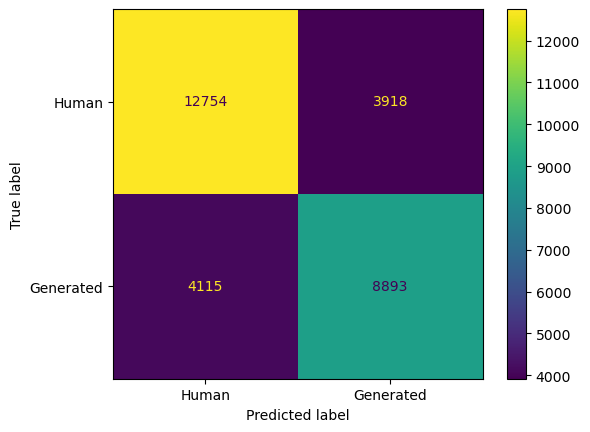

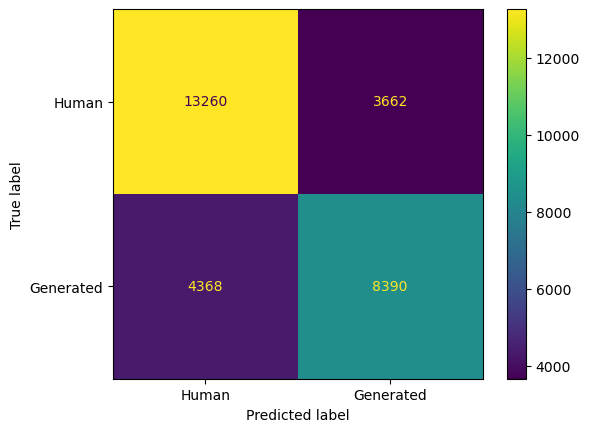

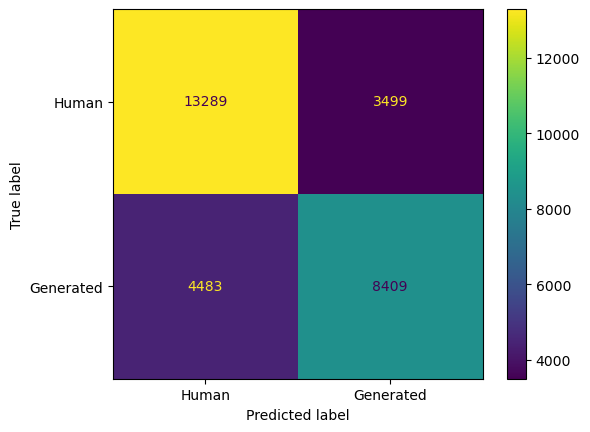

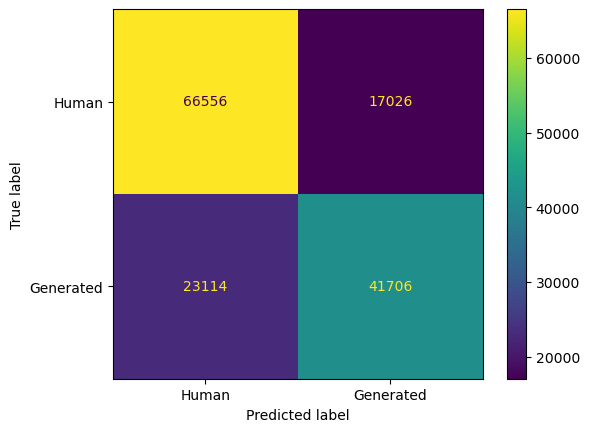

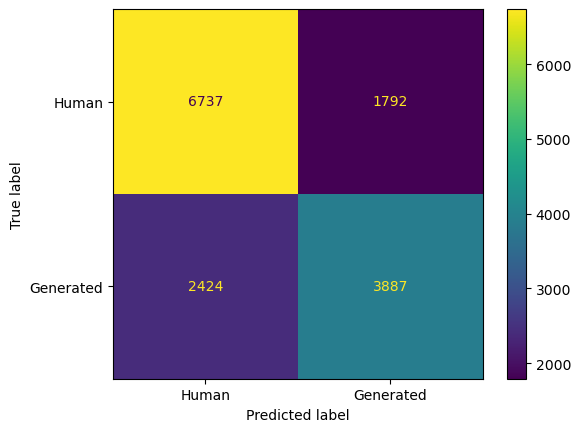

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# Initialize a weak learner (decision stump) as the base estimator for AdaBoost
dt_stump = DecisionTreeClassifier(max_depth=1, random_state=42)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
f1_per_fold = []

# Add lists for storing all true labels and predictions
all_val_true = []
all_val_pred = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split the data for the current fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create the AdaBoost model for the current fold
    ada_model = AdaBoostClassifier(estimator=dt_stump, n_estimators=100, algorithm='SAMME', random_state=42)
    
    # Train the AdaBoost model
    ada_model.fit(train_x_fold, train_y_fold)

    # Validation predictions and metrics
    val_pred_y = ada_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1_score = f1_score(val_y_fold, val_pred_y)
    
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1_score}")

    # Extend the lists with the true labels and predictions from this fold
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot()

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(val_report)

    # Accuracy and F1 score per fold
    accuracy_per_fold.append(val_accuracy * 100)
    f1_per_fold.append(val_f1_score)

    fold_no += 1

# Calculate and print the average accuracy and F1 score across folds
average_accuracy = np.mean(accuracy_per_fold)
average_f1_score = np.mean(f1_per_fold)
print(f"Average accuracy across folds: {average_accuracy}%")
print(f"Average F1 score across folds: {average_f1_score}")

# Overall Validation Confusion Matrix and Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = ada_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)
print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [25]:
joblib.dump(ada_model, 'ada_model1.pkl')

['ada_model1.pkl']

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Create a base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# Bagging Classifier with 100 estimators
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the model
bagging_model.fit(train_x_tfidf, train_y)

# **Train Predictions and Evaluation**:
train_pred_y = bagging_model.predict(train_x_tfidf)

# Train Accuracy and F1 Score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# **Test Predictions and Evaluation**:
test_pred_y = bagging_model.predict(test_x_tfidf)

# Test Accuracy and F1 Score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# **Confusion Matrix for Train Data**:
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# **Confusion Matrix for Test Data**:
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# **Classification Report for Test Data**:
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
joblib.dump(bagging_model, 'bagging_model.pkl')

Training fold 1...
Train Accuracy for fold 1: 99.77173372865794%
Train F1 Score for fold 1: 0.9973771570705458
Validation Accuracy for fold 1: 78.97644958053974%
Validation F1 Score for fold 1: 0.7445345124048145
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     16586
           1       0.80      0.69      0.74     13095

    accuracy                           0.79     29681
   macro avg       0.79      0.78      0.78     29681
weighted avg       0.79      0.79      0.79     29681

Training fold 2...
Train Accuracy for fold 2: 99.79194919180263%
Train F1 Score for fold 2: 0.9976107795436299
Validation Accuracy for fold 2: 78.78440753343891%
Validation F1 Score for fold 2: 0.7434508046445305
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     16614
           1       0.79      0.70      0.74     13067

    accuracy                           0.79     29681
   macro avg       0.79      

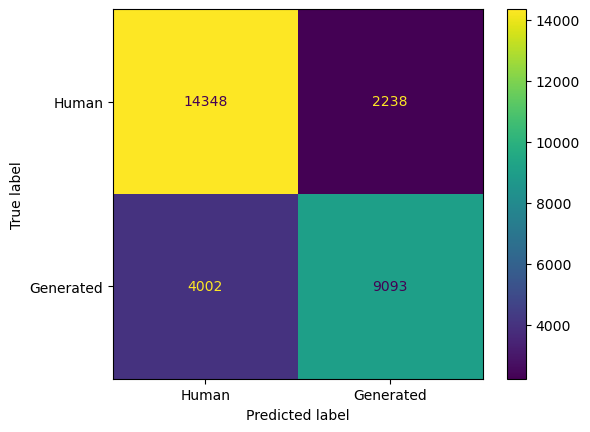

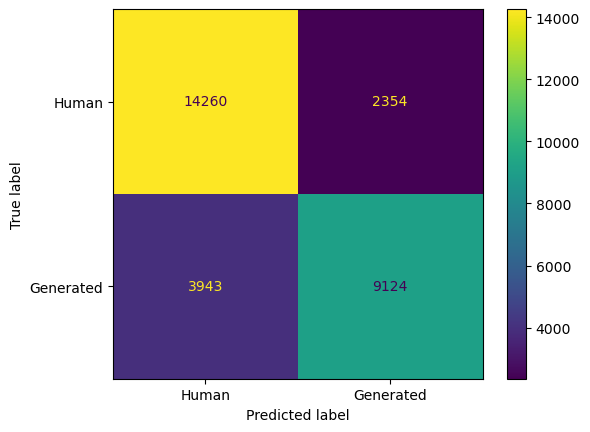

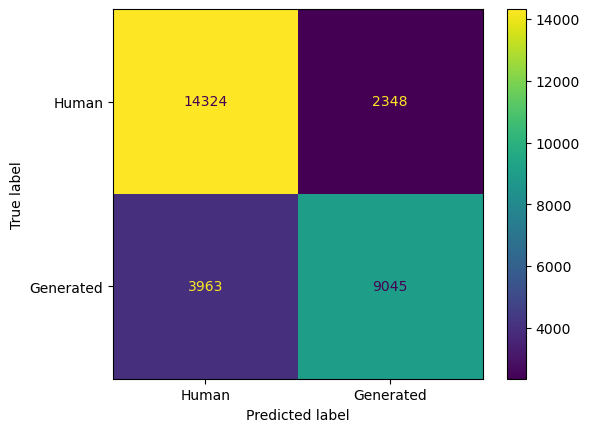

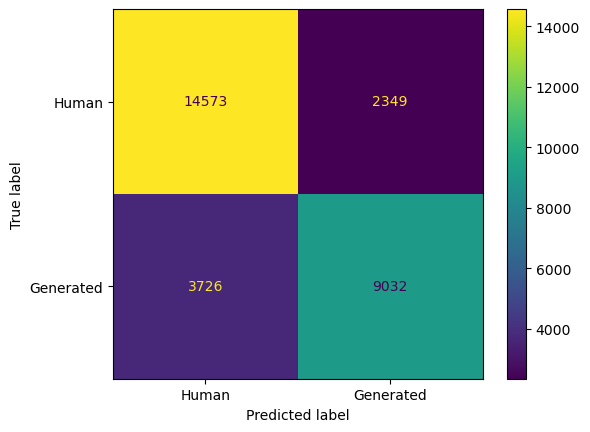

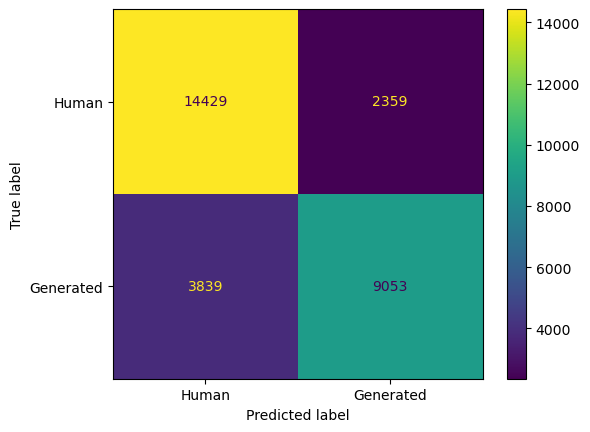

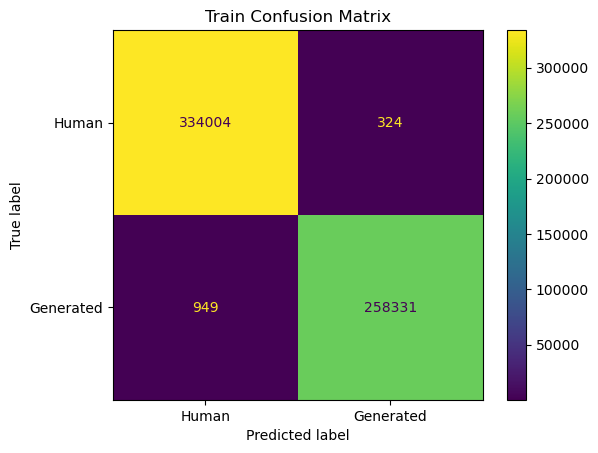

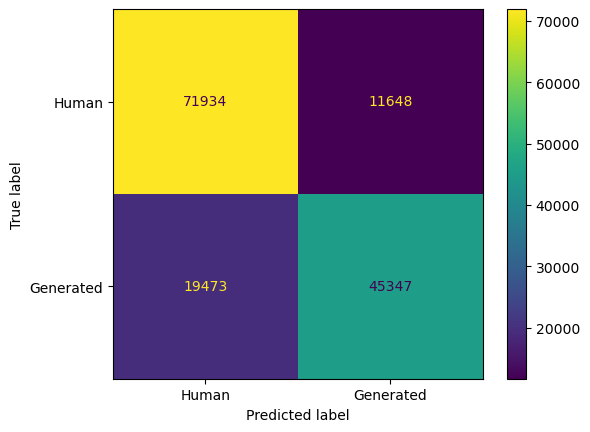

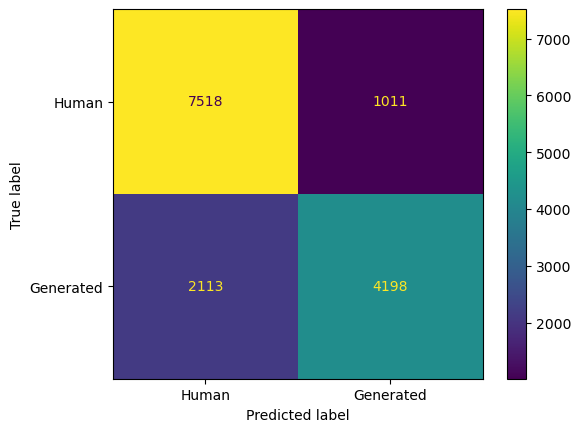

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# Initialize the base estimator (Decision Tree) for Bagging
base_estimator = DecisionTreeClassifier(random_state=42)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []

# Add lists for storing all true labels and predictions
all_val_true = []
all_val_pred = []

# Lists for storing training metrics
all_train_true = []
all_train_pred = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split the data for the current fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create the Bagging model for the current fold
    bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
    
    # Train the Bagging model
    bagging_model.fit(train_x_fold, train_y_fold)

    # Training predictions and metrics
    train_pred_y = bagging_model.predict(train_x_fold)
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1 = f1_score(train_y_fold, train_pred_y)
    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1}")

    # Extend the lists with the true labels and predictions from this fold for train set
    all_train_true.extend(train_y_fold)
    all_train_pred.extend(train_pred_y)

    # Validation predictions and metrics
    val_pred_y = bagging_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1 = f1_score(val_y_fold, val_pred_y)
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1}")

    # Extend the lists with the true labels and predictions from this fold for validation set
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot()

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(val_report)

    # Accuracy per fold
    accuracy_per_fold.append(val_accuracy * 100)
    
    fold_no += 1

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracy_per_fold)
print(f"Average accuracy across folds: {average_accuracy}%")

# Overall Train Metrics
train_accuracy_overall = accuracy_score(all_train_true, all_train_pred)
train_f1_overall = f1_score(all_train_true, all_train_pred)
print(f"\nOverall Train Accuracy: {train_accuracy_overall * 100}%")
print(f"Overall Train F1 Score: {train_f1_overall}")

# Confusion Matrix for overall Train data
train_conf_matrix = confusion_matrix(all_train_true, all_train_pred)
cmd_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=['Human', 'Generated'])
cmd_train.plot()
cmd_train.ax_.set_title("Train Confusion Matrix")

# Classification report for overall Train data
train_report = classification_report(all_train_true, all_train_pred)
print("\nOverall Train Classification Report:\n", train_report)

# Overall Validation Confusion Matrix and Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = bagging_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1 = f1_score(test_y, test_pred_y)
print(f"\nTest Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("\nTest Classification Report:\n", test_report)


In [27]:
joblib.dump(bagging_model, 'bagging_model1.pkl')

['bagging_model1.pkl']

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and fit the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = gradient_boosting_model.predict(train_x_tfidf)

# Train Accuracy and F1 Score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = gradient_boosting_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = gradient_boosting_model.predict(test_x_tfidf)

# Test Accuracy and F1 Score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
joblib.dump(gradient_boosting_model, 'gradient_boosting_model.pkl')

Training fold 1...
Train Accuracy for fold 1: 78.94643744577623%
Train F1 Score for fold 1: 0.7373840318564359
Validation Accuracy for fold 1: 78.19480475725211%
Validation F1 Score for fold 1: 0.7316081944098863
              precision    recall  f1-score   support

           0       0.77      0.87      0.82     16586
           1       0.80      0.67      0.73     13095

    accuracy                           0.78     29681
   macro avg       0.79      0.77      0.77     29681
weighted avg       0.78      0.78      0.78     29681

Training fold 2...
Train Accuracy for fold 2: 78.82682928883685%
Train F1 Score for fold 2: 0.7358643227169082
Validation Accuracy for fold 2: 78.34641689970015%
Validation F1 Score for fold 2: 0.7316380642198004
              precision    recall  f1-score   support

           0       0.77      0.87      0.82     16614
           1       0.81      0.67      0.73     13067

    accuracy                           0.78     29681
   macro avg       0.79      

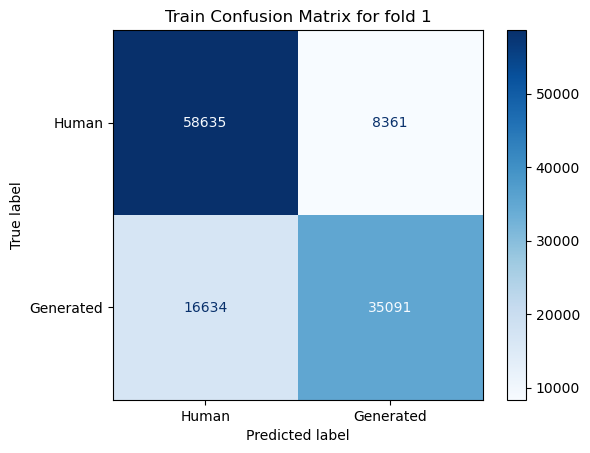

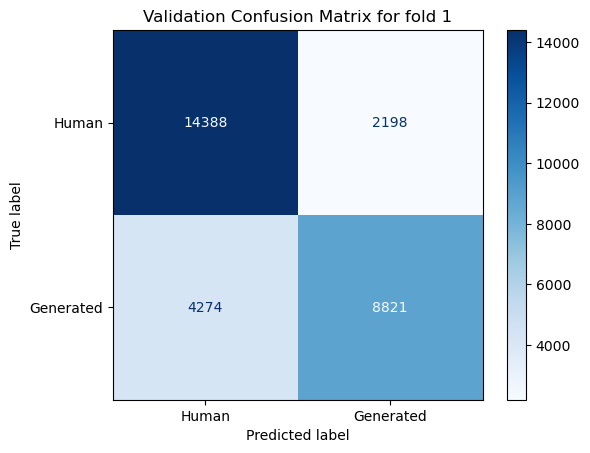

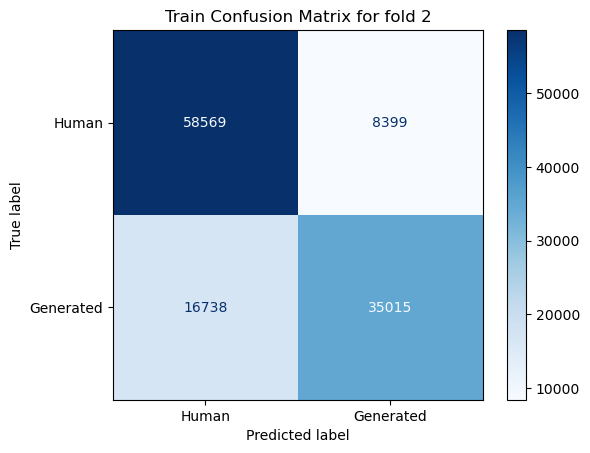

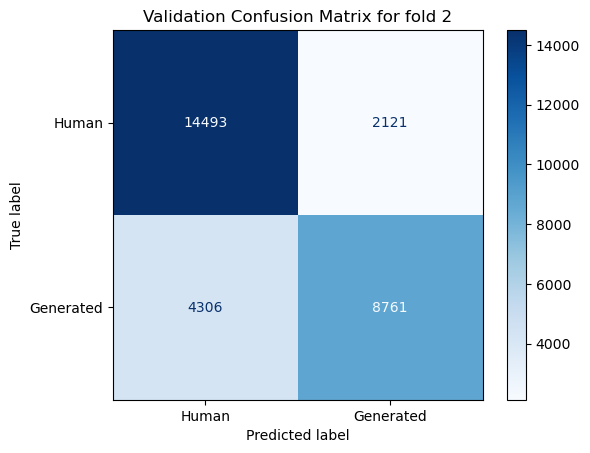

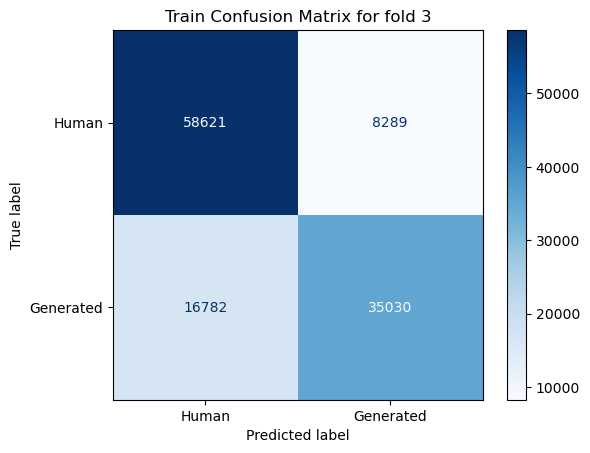

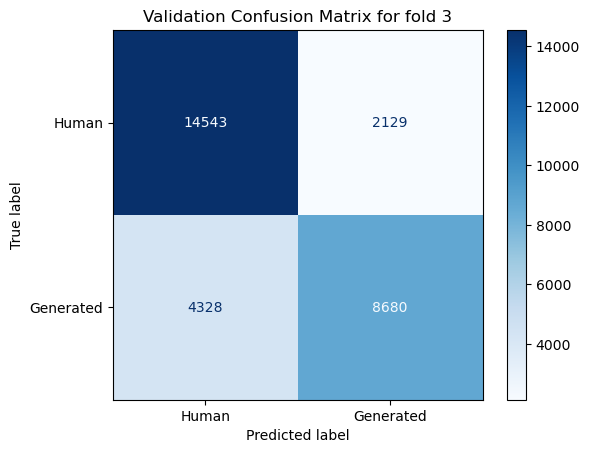

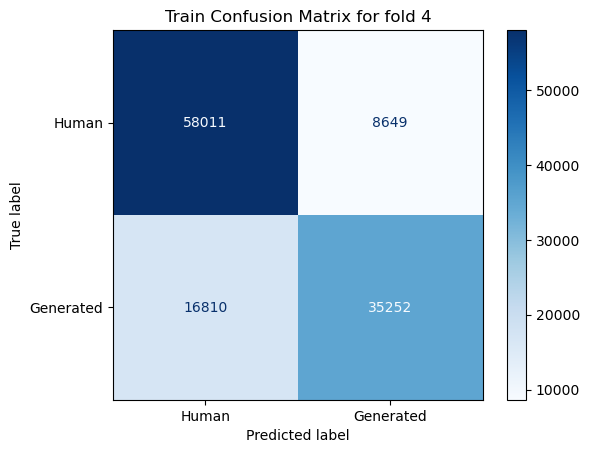

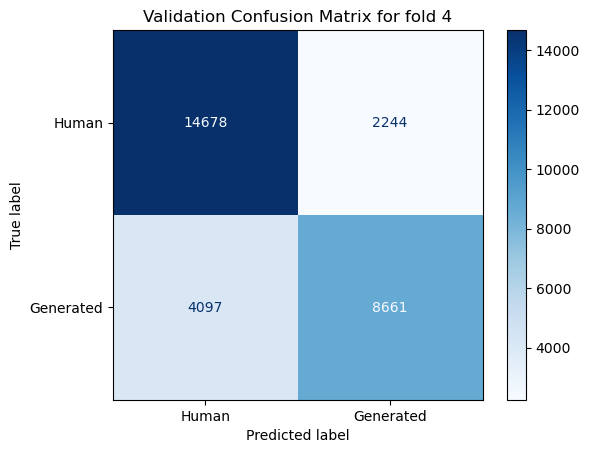

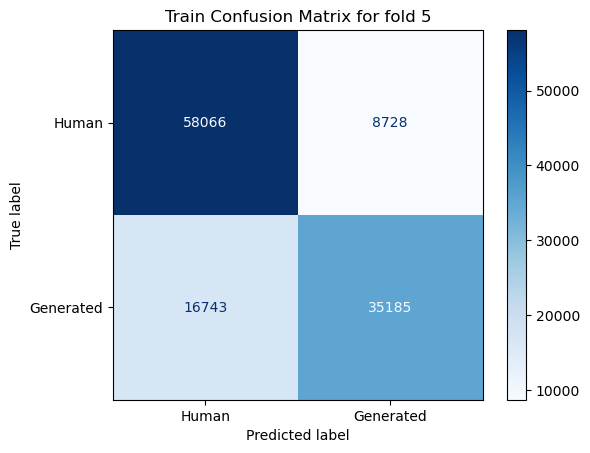

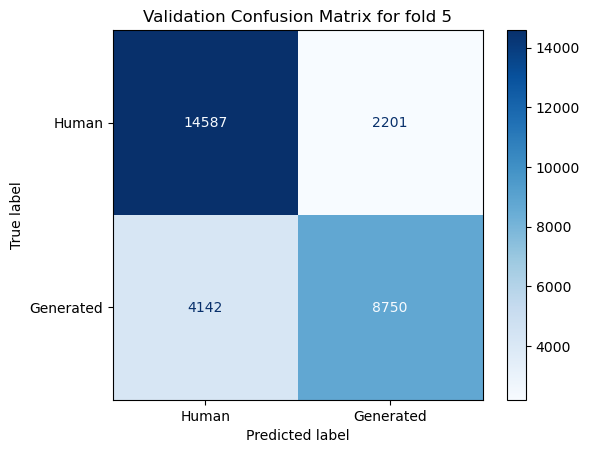

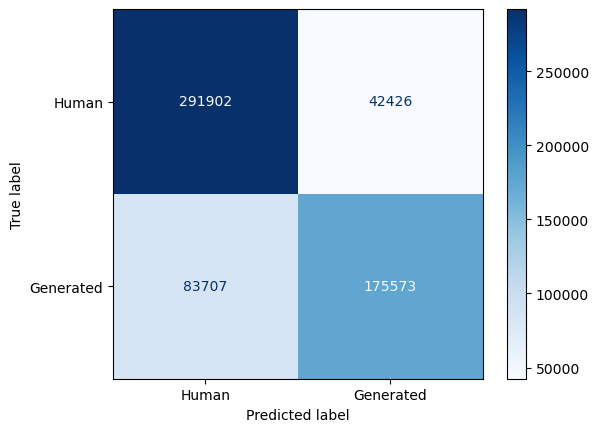

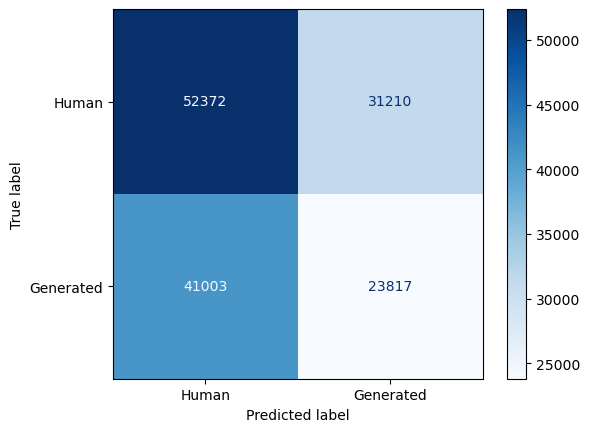

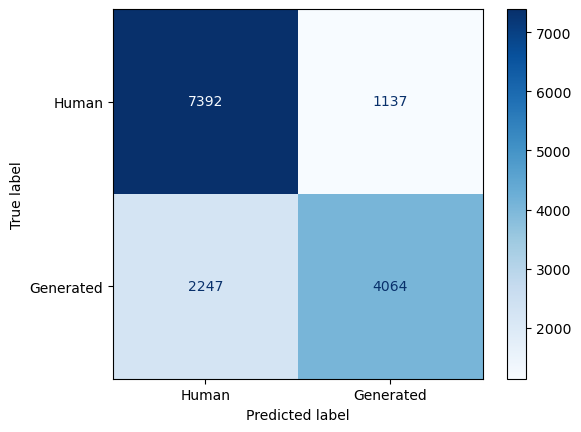

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []

# Add lists for storing all true labels and predictions
all_val_true = []
all_val_pred = []
all_train_true = []
all_train_pred = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split the data for the current fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create the Gradient Boosting model for the current fold
    gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    
    # Train the Gradient Boosting model
    gradient_boosting_model.fit(train_x_fold, train_y_fold)

    # Train predictions and metrics (train accuracy and F1 score)
    train_pred_y = gradient_boosting_model.predict(train_x_fold)
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1_score = f1_score(train_y_fold, train_pred_y)

    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1_score}")

    # Extend the lists with the true labels and predictions from this fold
    all_train_true.extend(train_y_fold)
    all_train_pred.extend(train_pred_y)
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Validation predictions and metrics
    val_pred_y = gradient_boosting_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    val_f1_score = f1_score(val_y_fold, val_pred_y)
    print(f"Validation F1 Score for fold {fold_no}: {val_f1_score}")

    # Confusion Matrix for train set
    train_cm = confusion_matrix(train_y_fold, train_pred_y)
    train_cmd = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Human', 'Generated'])
    train_cmd.plot(cmap='Blues')
    train_cmd.ax_.set_title(f"Train Confusion Matrix for fold {fold_no}")

    # Confusion Matrix for validation set
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    val_cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    val_cmd.plot(cmap='Blues')
    val_cmd.ax_.set_title(f"Validation Confusion Matrix for fold {fold_no}")

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(val_report)

    # Accuracy per fold
    accuracy_per_fold.append(val_accuracy * 100)
    
    fold_no += 1

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracy_per_fold)
print(f"Average accuracy across folds: {average_accuracy}%")

# Overall Train Confusion Matrix and Report
overall_train_cm = confusion_matrix(all_train_true, all_train_pred)
print("\nOverall Train Confusion Matrix:")
cmd_overall_train = ConfusionMatrixDisplay(confusion_matrix=overall_train_cm, display_labels=['Human', 'Generated'])
cmd_overall_train.plot(cmap='Blues')

overall_train_report = classification_report(all_train_true, all_train_pred)
print("\nOverall Train Classification Report:\n", overall_train_report)

# Overall Validation Confusion Matrix and Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall_val = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall_val.plot(cmap='Blues')

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = gradient_boosting_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)
print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot(cmap='Blues')

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [29]:
joblib.dump(gradient_boosting_model, 'gradient_boosting_model1.pkl')

['gradient_boosting_model1.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = rf_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = rf_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = rf_model.predict(test_x_tfidf)
print("Test Accuracy: ", accuracy_score(test_y, test_pred_y))

# Test F1 Score
test_f1_score = f1_score(test_y, test_pred_y)
print("Test F1 Score: ", test_f1_score)

# Confusion Matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion Matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
joblib.dump(rf_model, 'rf_model.pkl')

Training fold 1...
Train Accuracy for fold 1: 99.77257603962231%
Train F1 Score for fold 1: 0.9973865066305295
Validation Accuracy for fold 1: 79.589636467774%
Validation F1 Score for fold 1: 0.7443450371370696
              precision    recall  f1-score   support

           0       0.78      0.89      0.83     16586
           1       0.83      0.67      0.74     13095

    accuracy                           0.80     29681
   macro avg       0.80      0.78      0.79     29681
weighted avg       0.80      0.80      0.79     29681

Training fold 2...
Train Accuracy for fold 2: 99.79194919180263%
Train F1 Score for fold 2: 0.9976106870967429
Validation Accuracy for fold 2: 80.03099626023382%
Validation F1 Score for fold 2: 0.7490792091782735
              precision    recall  f1-score   support

           0       0.78      0.90      0.83     16614
           1       0.84      0.68      0.75     13067

    accuracy                           0.80     29681
   macro avg       0.81      0.

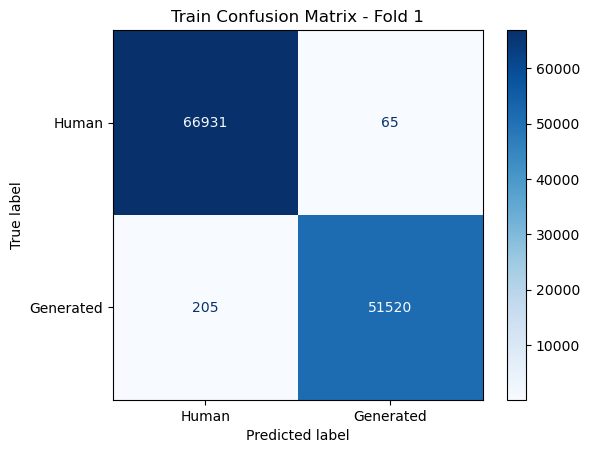

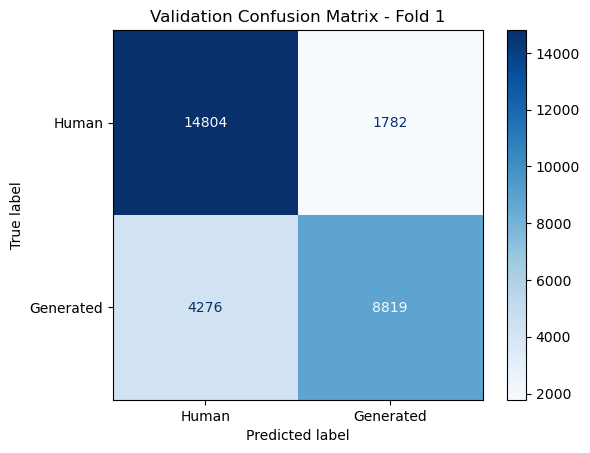

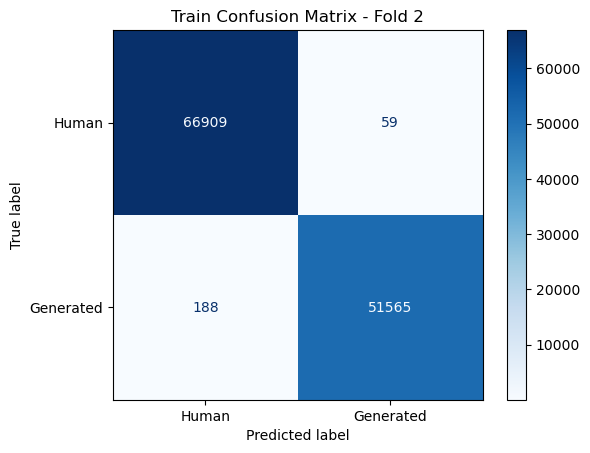

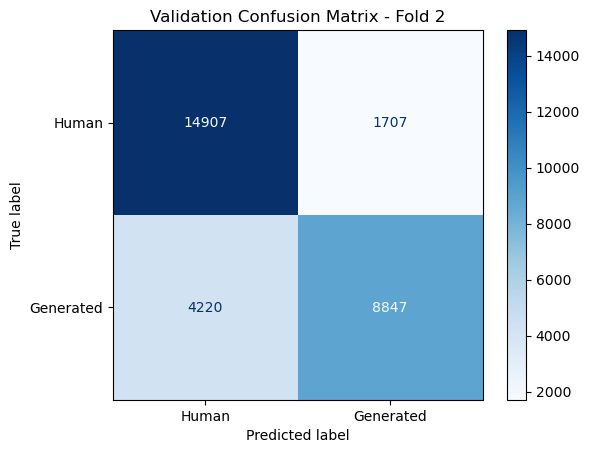

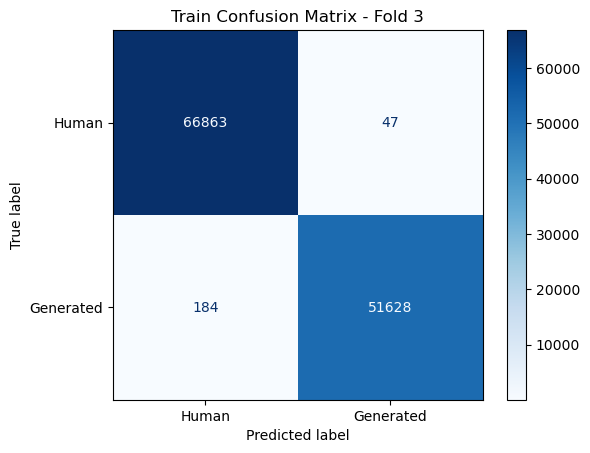

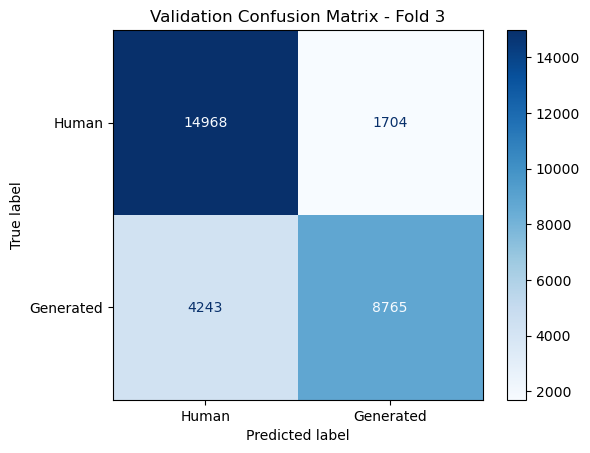

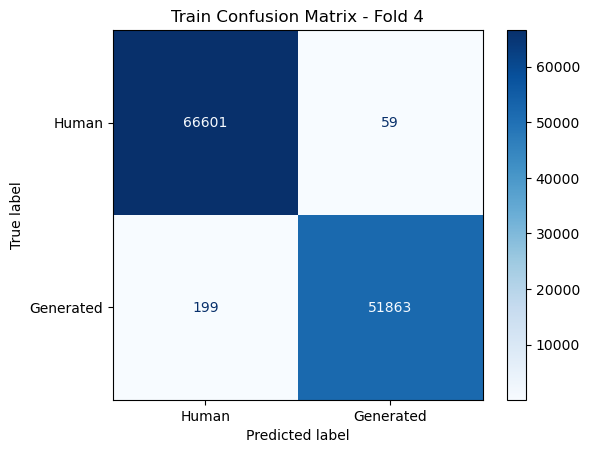

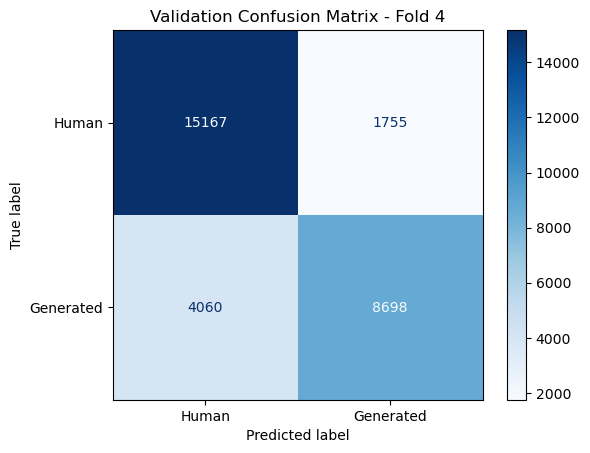

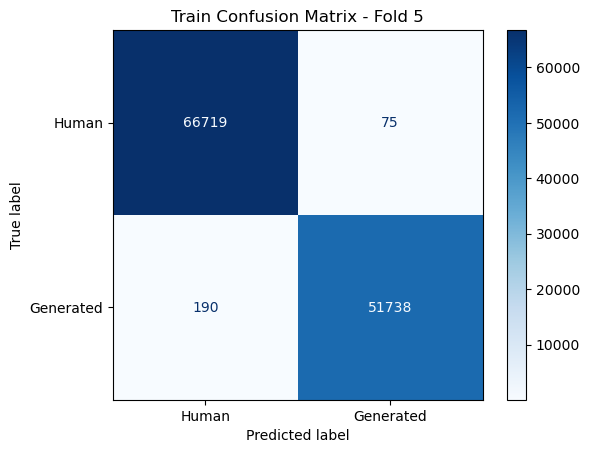

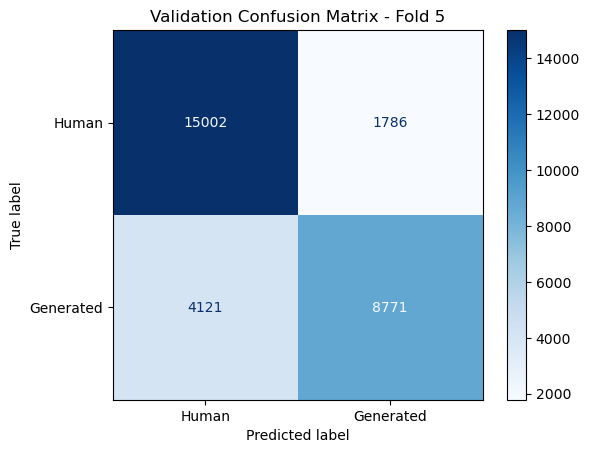

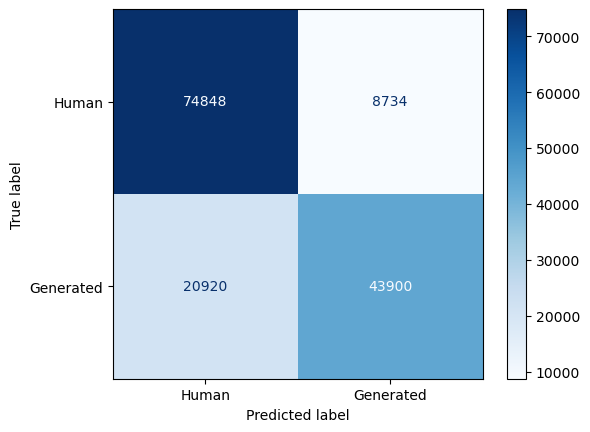

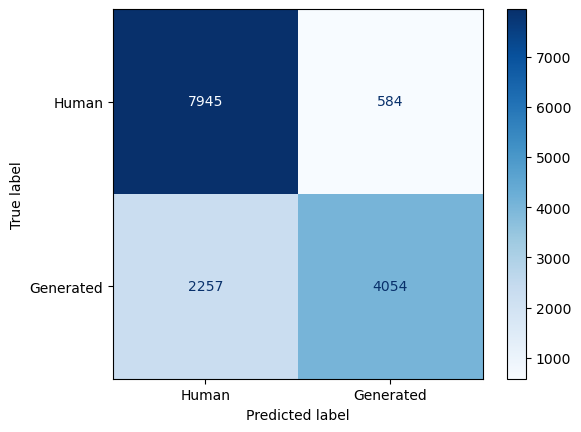

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
train_accuracy_per_fold = []
train_f1_per_fold = []
validation_reports = []
confusion_matrices = []

# Lists to store true labels and predictions for overall validation
all_val_true = []
all_val_pred = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split the data for the current fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create the Random Forest model for the current fold
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Train the Random Forest model
    rf_model.fit(train_x_fold, train_y_fold)

    # Train predictions and metrics
    train_pred_y = rf_model.predict(train_x_fold)
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1 = f1_score(train_y_fold, train_pred_y)
    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1}")

    # Validation predictions and metrics
    val_pred_y = rf_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1 = f1_score(val_y_fold, val_pred_y)
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1}")

    # Extend the lists with the true labels and predictions from this fold
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for train data (training fold)
    train_cm = confusion_matrix(train_y_fold, train_pred_y)
    confusion_matrices.append(train_cm)
    cmd_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Human', 'Generated'])
    cmd_train.plot(cmap='Blues')
    cmd_train.ax_.set_title(f"Train Confusion Matrix - Fold {fold_no}")

    # Confusion Matrix for validation data (fold)
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd_val = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd_val.plot(cmap='Blues')
    cmd_val.ax_.set_title(f"Validation Confusion Matrix - Fold {fold_no}")

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(val_report)

    # Accuracy per fold (validation)
    accuracy_per_fold.append(val_accuracy * 100)
    train_accuracy_per_fold.append(train_accuracy * 100)
    train_f1_per_fold.append(train_f1)

    fold_no += 1

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracy_per_fold)
average_train_accuracy = np.mean(train_accuracy_per_fold)
average_train_f1 = np.mean(train_f1_per_fold)
print(f"\nAverage validation accuracy across folds: {average_accuracy}%")
print(f"Average train accuracy across folds: {average_train_accuracy}%")
print(f"Average train F1 score across folds: {average_train_f1}")

# Overall Validation Confusion Matrix and Classification Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot(cmap='Blues')

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = rf_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)
print(f"\nTest Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot(cmap='Blues')

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("\nTest Classification Report:\n", test_report)


In [31]:
joblib.dump(rf_model, 'rf_model1.pkl')

['rf_model1.pkl']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize the Extra Trees model
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = extra_trees_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions (you already have this)
valid_pred_y = extra_trees_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = extra_trees_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
joblib.dump(extra_trees_model, 'extra_trees_model.pkl')

Training fold 1...
Train Accuracy for fold 1: 99.77257603962231%
Train F1 Score for fold 1: 0.997383467390251
Validation Accuracy for fold 1: 79.23924396078299%
Validation F1 Score for fold 1: 0.745140210108363
Validation Report for fold 1:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82     16586
           1       0.81      0.69      0.75     13095

    accuracy                           0.79     29681
   macro avg       0.80      0.78      0.79     29681
weighted avg       0.79      0.79      0.79     29681

Training fold 2...
Train Accuracy for fold 2: 99.79194919180263%
Train F1 Score for fold 2: 0.9976081420008328
Validation Accuracy for fold 2: 79.25272059566726%
Validation F1 Score for fold 2: 0.7450103519668737
Validation Report for fold 2:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83     16614
           1       0.81      0.69      0.75     13067

    accuracy           

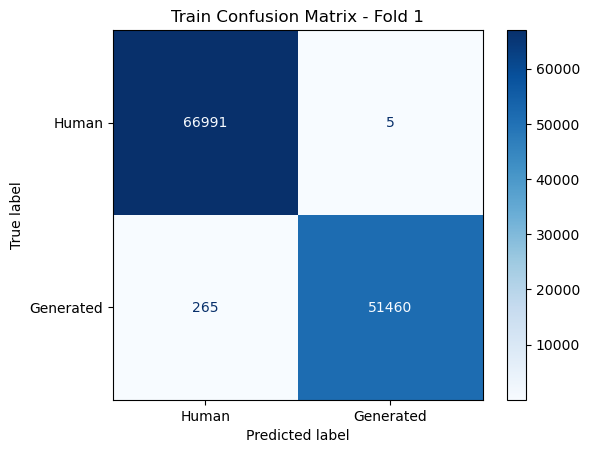

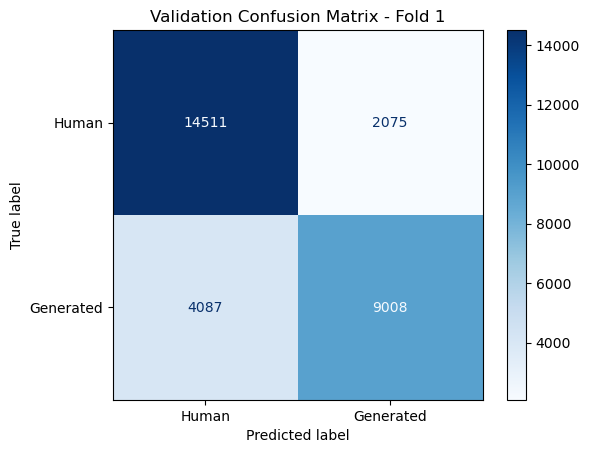

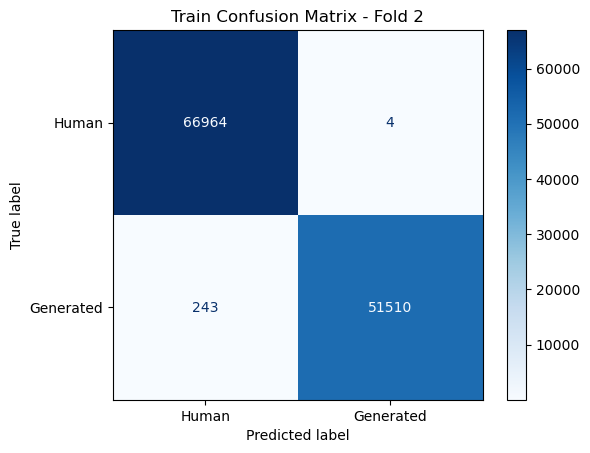

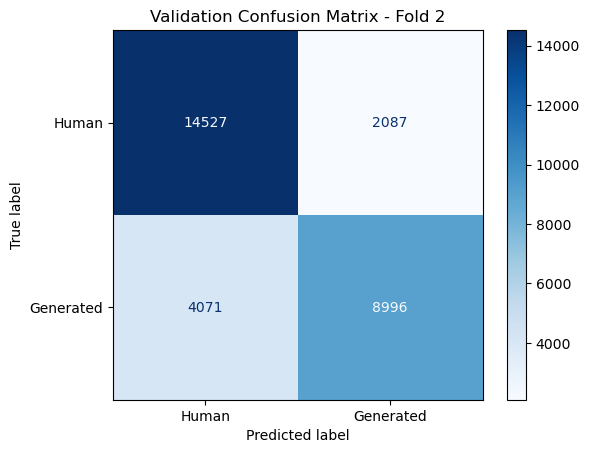

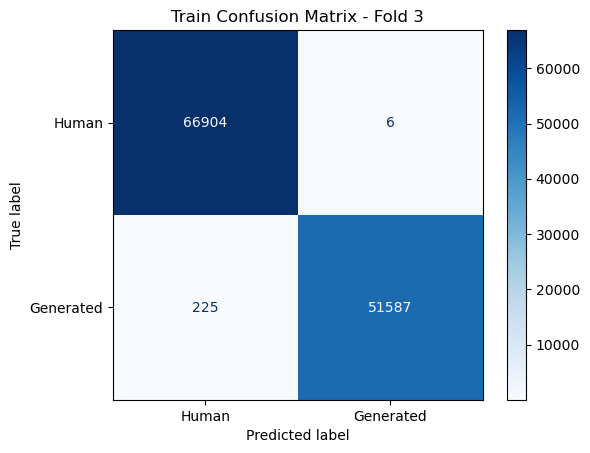

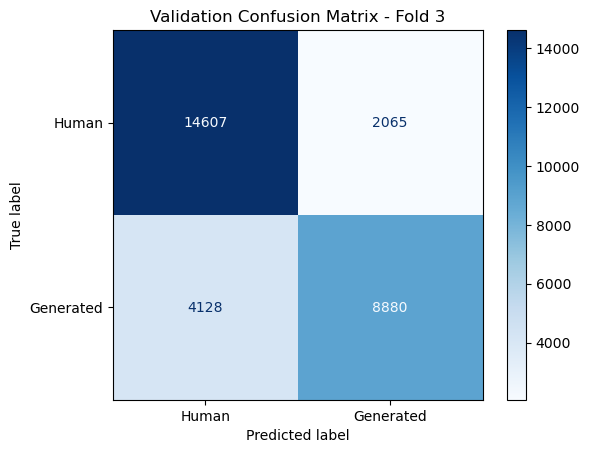

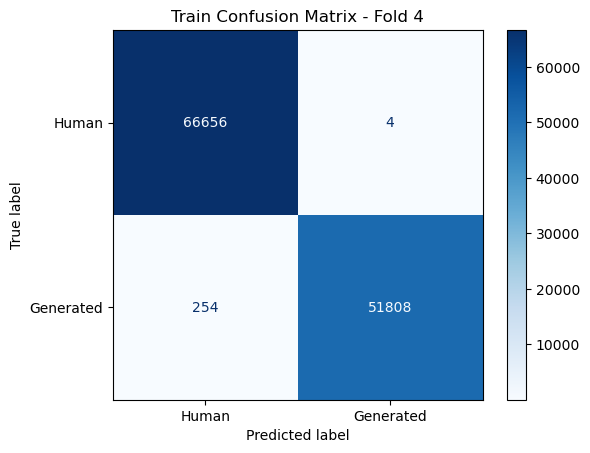

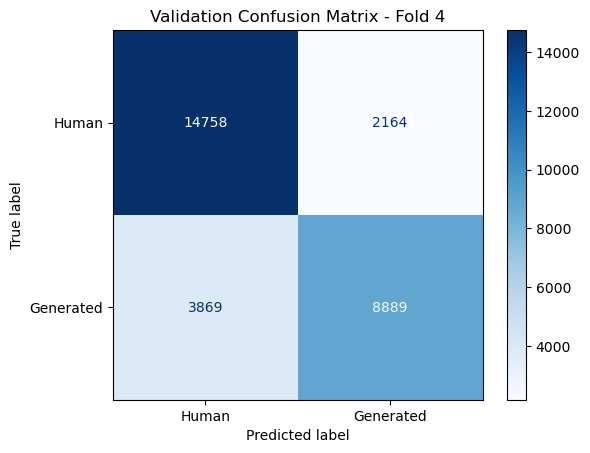

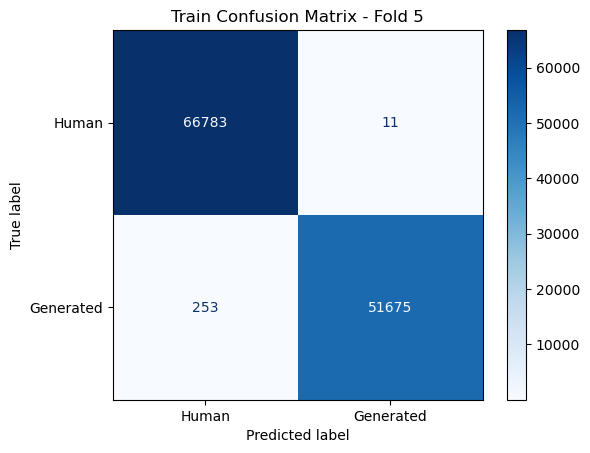

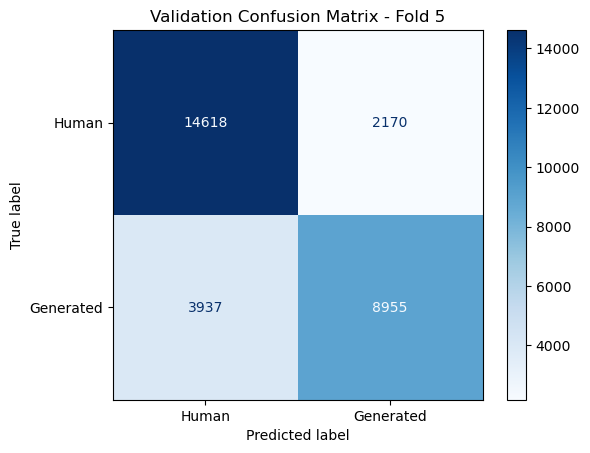

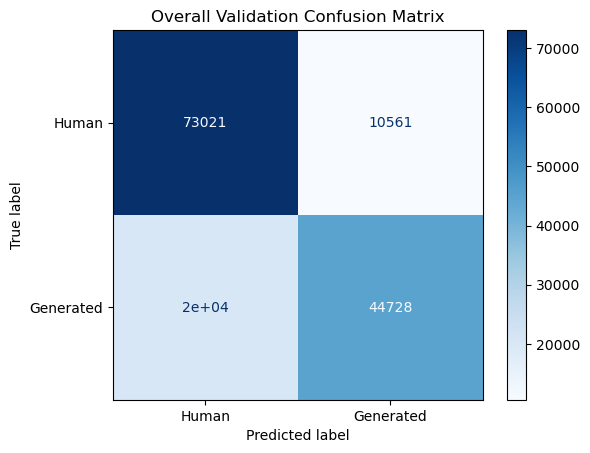

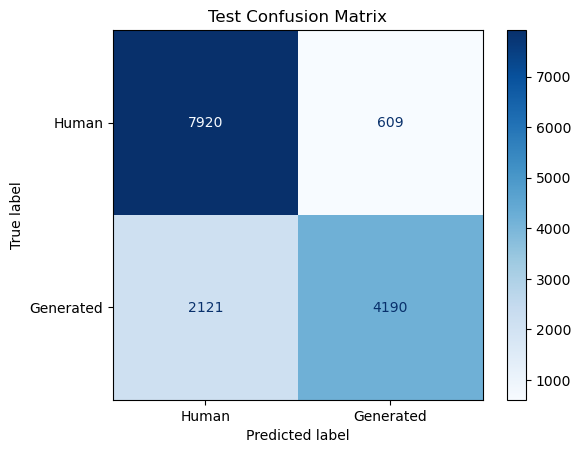

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
f1_score_per_fold = []
validation_reports = []
confusion_matrices = []

# Lists to store true labels and predictions for overall validation
all_val_true = []
all_val_pred = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split the data for the current fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create the Extra Trees Classifier model for the current fold
    extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

    # Train the model
    extra_trees_model.fit(train_x_fold, train_y_fold)

    # Train predictions and metrics
    train_pred_y = extra_trees_model.predict(train_x_fold)
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1_score = f1_score(train_y_fold, train_pred_y)

    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1_score}")

    # Validation predictions and metrics
    val_pred_y = extra_trees_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1_score = f1_score(val_y_fold, val_pred_y)

    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1_score}")

    # Extend the lists with the true labels and predictions from this fold
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for training
    train_cm = confusion_matrix(train_y_fold, train_pred_y)
    train_cmd = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Human', 'Generated'])
    train_cmd.plot(cmap='Blues')
    train_cmd.ax_.set_title(f"Train Confusion Matrix - Fold {fold_no}")

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot(cmap='Blues')
    cmd.ax_.set_title(f"Validation Confusion Matrix - Fold {fold_no}")

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(f"Validation Report for fold {fold_no}:\n", val_report)

    # Accuracy and F1 score per fold
    accuracy_per_fold.append(val_accuracy * 100)
    f1_score_per_fold.append(val_f1_score)

    fold_no += 1

# Calculate and print the average accuracy and F1 score across folds
average_accuracy = np.mean(accuracy_per_fold)
average_f1_score = np.mean(f1_score_per_fold)
print(f"Average accuracy across folds: {average_accuracy}%")
print(f"Average F1 Score across folds: {average_f1_score}")

# Overall Validation Confusion Matrix and Classification Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot(cmap='Blues')
cmd_overall.ax_.set_title("Overall Validation Confusion Matrix")

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = extra_trees_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot(cmap='Blues')
cmd_test.ax_.set_title("Test Confusion Matrix")

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [33]:
joblib.dump(extra_trees_model, 'extra_trees_model1.pkl')

['extra_trees_model1.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_x_tfidf, train_y)

# 1. Train Accuracy and F1 Score
train_pred_y = log_reg.predict(train_x_tfidf)
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy (Logistic Regression): ", train_accuracy)
print("Train F1 Score (Logistic Regression): ", train_f1_score)

# 2. Validation Accuracy (Already in your code)
valid_pred_y = log_reg.predict(valid_x_tfidf)
print("Validation Accuracy (Logistic Regression): ", accuracy_score(valid_y, valid_pred_y))

# 3. Test Accuracy and F1 Score
log_reg_pred = log_reg.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, log_reg_pred)
test_f1_score = f1_score(test_y, log_reg_pred)

print("Test Accuracy (Logistic Regression): ", test_accuracy)
print("Test F1 Score (Logistic Regression): ", test_f1_score)

# 4. Confusion Matrix for Train Data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# 5. Confusion Matrix for Test Data
test_conf_matrix = confusion_matrix(test_y, log_reg_pred)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# 6. Classification Report for Test Data
log_reg_report = classification_report(test_y, log_reg_pred)
print("Test Classification Report:\n", log_reg_report)


In [ ]:
joblib.dump(log_reg, 'logistic_regression_model.pkl')

Training fold 1...
Train Accuracy for fold 1: 81.96191069819156%
Train F1 Score for fold 1: 0.7892701455379195
Validation Accuracy for fold 1: 80.49930932246218%
Validation F1 Score for fold 1: 0.7757632109096544
Validation Classification Report for fold 1:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     16586
           1       0.79      0.76      0.78     13095

    accuracy                           0.80     29681
   macro avg       0.80      0.80      0.80     29681
weighted avg       0.80      0.80      0.80     29681

Training fold 2...
Train Accuracy for fold 2: 81.82461401100059%
Train F1 Score for fold 2: 0.78816021990968
Validation Accuracy for fold 2: 80.42855698931976%
Validation F1 Score for fold 2: 0.7739072899233255
Validation Classification Report for fold 2:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     16614
           1       0.79      0.76      0.77     

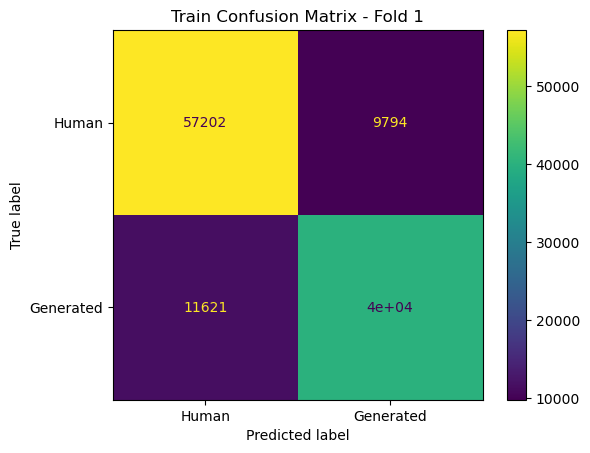

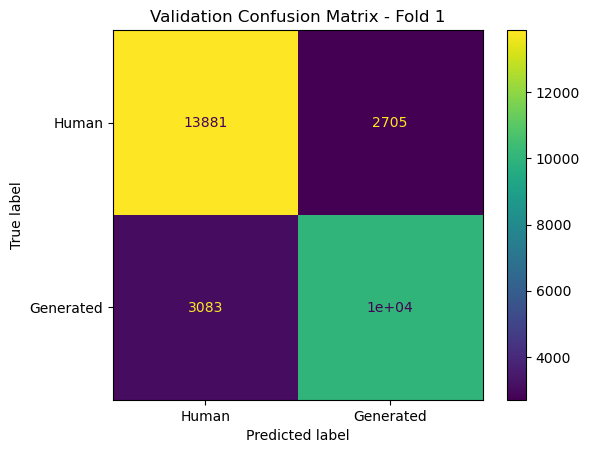

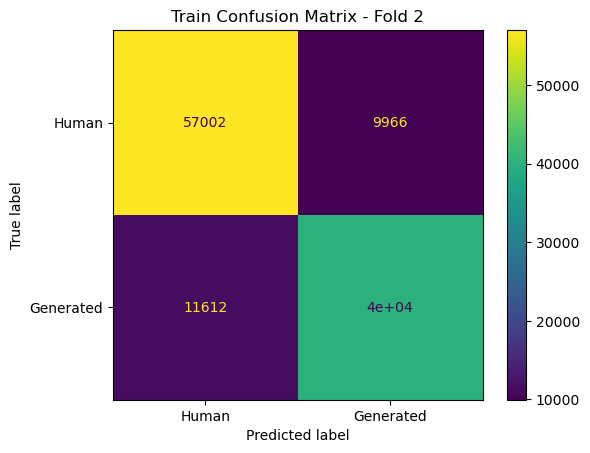

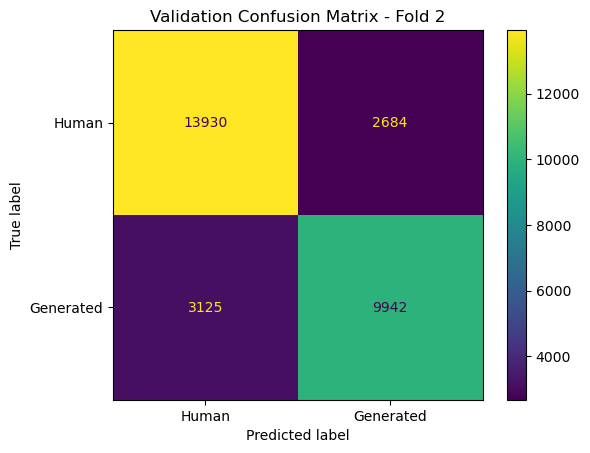

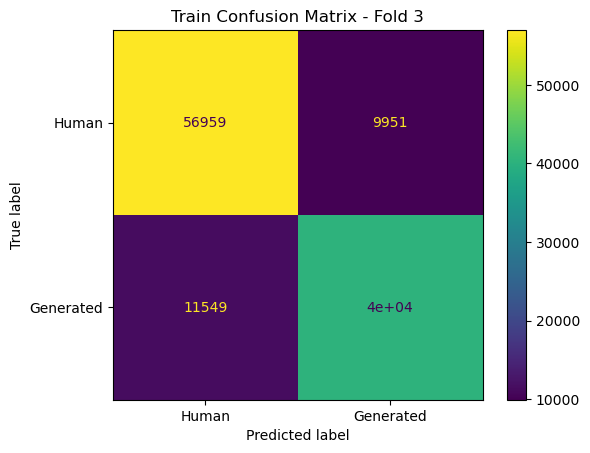

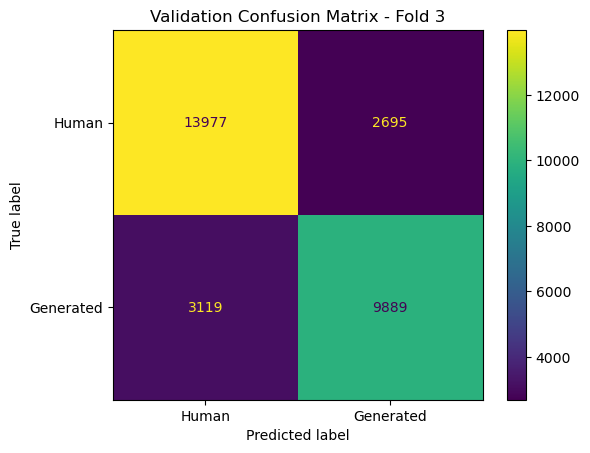

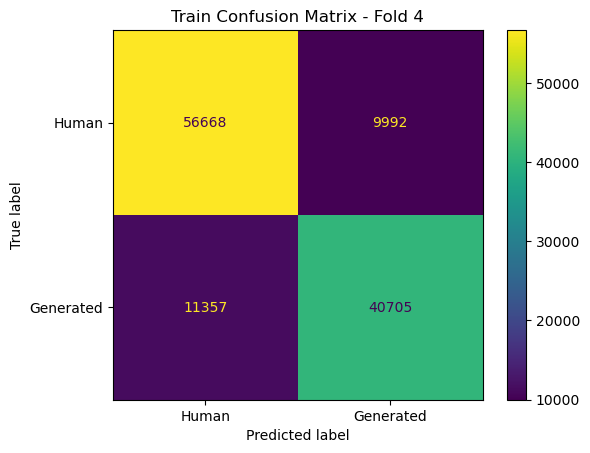

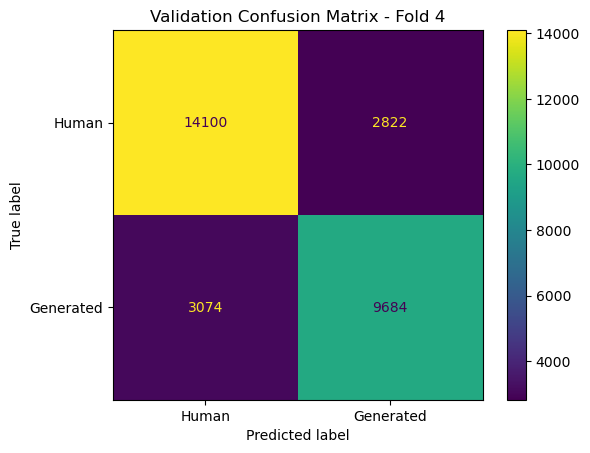

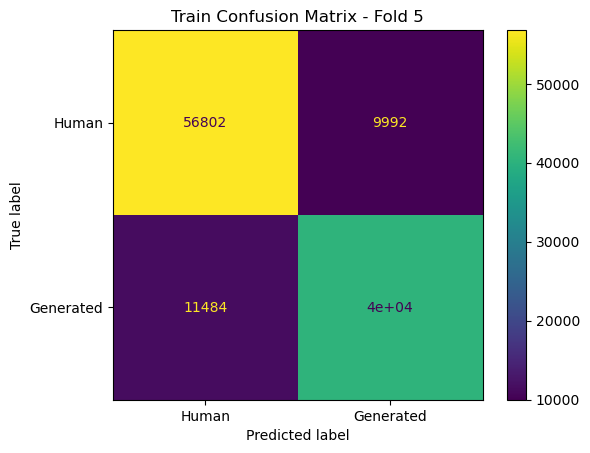

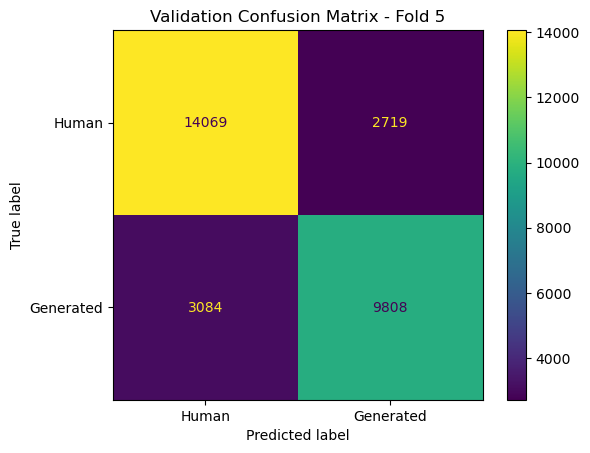

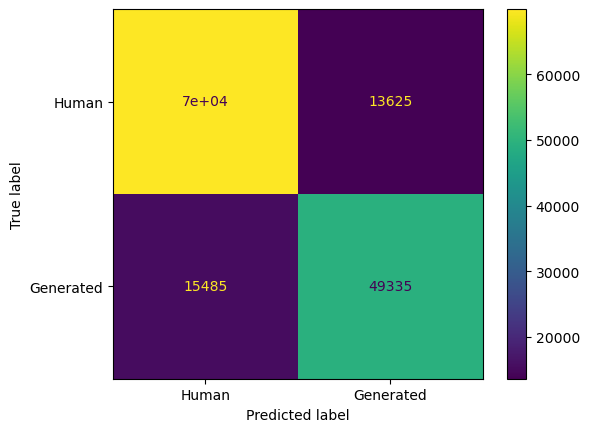

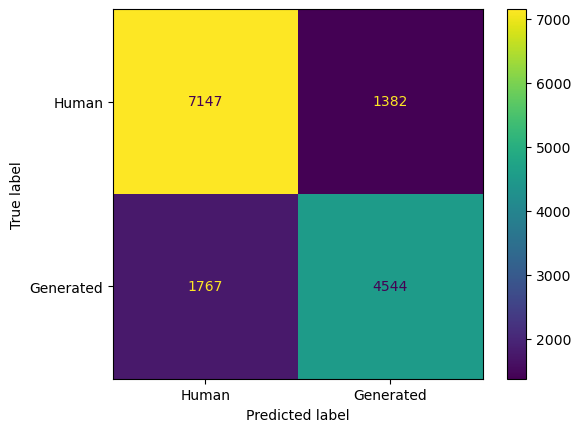

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
validation_reports = []
train_confusion_matrices = []
validation_confusion_matrices = []

# Lists to store true labels and predictions for overall validation
all_val_true = []
all_val_pred = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split the data for the current fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create the Logistic Regression model for the current fold
    log_reg = LogisticRegression(max_iter=1000)

    # Train the model
    log_reg.fit(train_x_fold, train_y_fold)

    # Train predictions and metrics
    train_pred_y = log_reg.predict(train_x_fold)
    train_accuracy = accuracy_score(train_y_fold, train_pred_y)
    train_f1_score = f1_score(train_y_fold, train_pred_y)
    print(f"Train Accuracy for fold {fold_no}: {train_accuracy * 100}%")
    print(f"Train F1 Score for fold {fold_no}: {train_f1_score}")

    # Confusion Matrix for train data
    train_cm = confusion_matrix(train_y_fold, train_pred_y)
    train_confusion_matrices.append(train_cm)
    train_cmd = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Human', 'Generated'])
    train_cmd.plot()
    train_cmd.ax_.set_title(f"Train Confusion Matrix - Fold {fold_no}")

    # Validation predictions and metrics
    val_pred_y = log_reg.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_f1_score = f1_score(val_y_fold, val_pred_y)
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation F1 Score for fold {fold_no}: {val_f1_score}")

    # Extend the lists with the true labels and predictions from this fold
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    validation_confusion_matrices.append(val_cm)
    val_cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    val_cmd.plot()
    val_cmd.ax_.set_title(f"Validation Confusion Matrix - Fold {fold_no}")

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(f"Validation Classification Report for fold {fold_no}:\n", val_report)

    # Accuracy per fold
    accuracy_per_fold.append(val_accuracy * 100)
    
    fold_no += 1

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracy_per_fold)
print(f"Average validation accuracy across folds: {average_accuracy}%")

# Overall Validation Confusion Matrix and Classification Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = log_reg.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)
print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test F1 Score: {test_f1_score}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [35]:
joblib.dump(log_reg, 'logistic_regression_model1.pkl')

['logistic_regression_model1.pkl']

LDA MODEL

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
validation_reports = []
train_confusion_matrices = []
validation_confusion_matrices = []

# Lists to store true labels and predictions for overall validation
all_val_true = []
all_val_pred = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split the data for the current fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create the LDA model for the current fold
    lda_model = LinearDiscriminantAnalysis()

    # Train the model
    lda_model.fit(train_x_fold, train_y_fold)

    # Validation predictions and metrics
    val_pred_y = lda_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")

    # Extend the lists with the true labels and predictions from this fold
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot()

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(val_report)

    # Accuracy per fold
    accuracy_per_fold.append(val_accuracy * 100)
    
    fold_no += 1

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracy_per_fold)
print(f"Average accuracy across folds: {average_accuracy}%")

# Overall Validation Confusion Matrix and Classification Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = lda_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
print(f"Test Accuracy: {test_accuracy * 100}%")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


NameError: name 'train_x_tfidf' is not defined

In [ ]:
joblib.dump(lda_model, 'lda_model.pkl')

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, matthews_corrcoef
from sklearn.model_selection import KFold
import numpy as np

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
mcc_per_fold = []
validation_reports = []
confusion_matrices = []

# Lists to store true labels and predictions for overall validation
all_val_true = []
all_val_pred = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    # Split the data for the current fold
    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Create the LDA model for the current fold
    lda_model = LinearDiscriminantAnalysis()

    # Train the model
    lda_model.fit(train_x_fold, train_y_fold)

    # Validation predictions and metrics
    val_pred_y = lda_model.predict(val_x_fold)
    val_accuracy = accuracy_score(val_y_fold, val_pred_y)
    val_mcc = matthews_corrcoef(val_y_fold, val_pred_y)  # Calculate MCC for the current fold
    print(f"Validation Accuracy for fold {fold_no}: {val_accuracy * 100}%")
    print(f"Validation MCC for fold {fold_no}: {val_mcc}")

    # Extend the lists with the true labels and predictions from this fold
    all_val_true.extend(val_y_fold)
    all_val_pred.extend(val_pred_y)

    # Confusion Matrix for validation
    val_cm = confusion_matrix(val_y_fold, val_pred_y)
    confusion_matrices.append(val_cm)
    cmd = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Human', 'Generated'])
    cmd.plot()

    # Classification report for validation
    val_report = classification_report(val_y_fold, val_pred_y)
    validation_reports.append(val_report)
    print(val_report)

    # Accuracy and MCC per fold
    accuracy_per_fold.append(val_accuracy * 100)
    mcc_per_fold.append(val_mcc)
    
    fold_no += 1

# Calculate and print the average accuracy and MCC across folds
average_accuracy = np.mean(accuracy_per_fold)
average_mcc = np.mean(mcc_per_fold)
print(f"Average accuracy across folds: {average_accuracy}%")
print(f"Average MCC across folds: {average_mcc}")

# Overall Validation Confusion Matrix and Classification Report
overall_val_cm = confusion_matrix(all_val_true, all_val_pred)
print("\nOverall Validation Confusion Matrix:")
cmd_overall = ConfusionMatrixDisplay(confusion_matrix=overall_val_cm, display_labels=['Human', 'Generated'])
cmd_overall.plot()

overall_val_report = classification_report(all_val_true, all_val_pred)
print("\nOverall Validation Classification Report:\n", overall_val_report)

# Test set evaluation after K-Fold Cross Validation
test_pred_y = lda_model.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, test_pred_y)
test_mcc = matthews_corrcoef(test_y, test_pred_y)  # Calculate MCC for the test set
print(f"Test Accuracy: {test_accuracy * 100}%")
print(f"Test MCC: {test_mcc}")

# Test set Confusion Matrix
test_cm = confusion_matrix(test_y, test_pred_y)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['Human', 'Generated'])
cmd_test.plot()

# Test set Classification report
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)
acc_score = []
y2 = train_data['label']
# LDA
for train_index , test_index in kf.split(train_x_tfidf):
    X_train , X_test = X2[train_index] , X2[test_index]
    y_train , y_test = y2[train_index] , y2[test_index]
     
    lda.fit(X_train,y_train)
    pred_values = lda.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_values))

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy rf : {}'.format(avg_acc_score))


In [ ]:
from sklearn.model_selection import KFold
from sklearn.decomposition import LatentDirichletAllocation as LDA

k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)
train_acc_score = []
valid_acc_score = []
test_acc_score = []

# Initialize LDA model
lda = LDA(n_components=2)

# Perform KFold Cross Validation
for train_index, test_index in kf.split(train_x_tfidf):
    X_train, X_test = train_x_tfidf[train_index], train_x_tfidf[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    
    lda.fit(X_train)
    
    train_pred_values = lda.transform(X_test).argmax(axis=1)  # Get the predicted labels by LDA
    
    # Predict on validation set
    valid_pred_values = lda.transform(valid_x_tfidf).argmax(axis=1)
    
    # Predict on test set
    test_pred_values = lda.transform(test_x_tfidf).argmax(axis=1)
    
    # Calculate accuracy for the train fold
    train_acc = accuracy_score(y_test, train_pred_values)
    train_acc_score.append(train_acc)
    
    # Calculate accuracy for the validation set
    valid_acc = accuracy_score(valid_y, valid_pred_values)
    valid_acc_score.append(valid_acc)
    
    # Calculate accuracy for the test set
    test_acc = accuracy_score(test_y, test_pred_values)
    test_acc_score.append(test_acc)

# Average accuracy over all folds for training, validation, and test sets
avg_train_acc_score = sum(train_acc_score) / k
avg_valid_acc_score = sum(valid_acc_score) / k
avg_test_acc_score = sum(test_acc_score) / k

# Final classification report for the last fold (as an example)
print(classification_report(test_y, test_pred_values))

# Output accuracy of each fold and average accuracy
print(f'Accuracy of each fold (Train): {train_acc_score}')
print(f'Average Train Accuracy: {avg_train_acc_score}')
print(f'Accuracy of each fold (Validation): {valid_acc_score}')
print(f'Average Validation Accuracy: {avg_valid_acc_score}')
print(f'Accuracy of each fold (Test): {test_acc_score}')
print(f'Average Test Accuracy: {avg_test_acc_score}')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import numpy as np

# Assuming X2 and y2 are already defined
k = 10  # Number of splits for K-Fold
kf = KFold(n_splits=k, random_state=42, shuffle=True)
acc_score = []

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X2):
    X_train, X_test = X2[train_index], X2[test_index]
    y_train, y_test = y2[train_index], y2[test_index]

    # Fit the model
    log_reg.fit(X_train, y_train)
    
    # Predict values
    pred_values = log_reg.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    # Optionally print the classification report for each fold
    print(classification_report(y_test, pred_values))

# Calculate average accuracy
avg_acc_score = np.mean(acc_score)

print('Accuracy of each fold: {}'.format(acc_score))
print('Avg accuracy (Logistic Regression): {}'.format(avg_acc_score))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming train_x_tfidf and train_y are already defined
k = 10  # Number of splits for K-Fold
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_scores = []  # List to store accuracy scores for each fold

for train_index, valid_index in kf.split(train_x_tfidf):
    X_train, X_valid = train_x_tfidf[train_index], train_x_tfidf[valid_index]
    y_train, y_valid = train_y[train_index], train_y[valid_index]

    # Reshape the input for the CNN
    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_valid_reshaped = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))

    # Define the CNN model
    model_CNN = Sequential()
    model_CNN.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model_CNN.add(MaxPooling1D(pool_size=2))
    model_CNN.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model_CNN.add(MaxPooling1D(pool_size=2))
    model_CNN.add(Flatten())
    model_CNN.add(Dense(128, activation='relu'))
    model_CNN.add(Dropout(0.5))
    model_CNN.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    model_CNN.fit(X_train_reshaped, y_train, validation_data=(X_valid_reshaped, y_valid), epochs=3, verbose=1)

    # Predict on validation set
    valid_pred_y = (model_CNN.predict(X_valid_reshaped) > 0.5).astype("int32").flatten()

    # Calculate accuracy
    acc = accuracy_score(y_valid, valid_pred_y)
    acc_scores.append(acc)

    # Print classification report
    print("Classification report for fold:")
    print(classification_report(y_valid, valid_pred_y))

# Calculate and print average accuracy across all folds
avg_acc_score = np.mean(acc_scores)
print('Accuracy of each fold: {}'.format(acc_scores))
print('Avg accuracy (CNN): {}'.format(avg_acc_score))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

train_x_tfidf = np.expand_dims(train_x_tfidf, axis=-1) 
train_y = np.array(train_y)


def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 3
accuracy_per_fold = []

for train_index, val_index in kf.split(train_x_tfidf):
    print(f"Training fold {fold_no}...")

    train_x_fold, val_x_fold = train_x_tfidf[train_index], train_x_tfidf[val_index]
    train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    model = create_model(input_shape=(train_x_tfidf.shape[1], 1))
    model.fit(train_x_fold, train_y_fold, epochs=10, batch_size=64, verbose=2)

    scores = model.evaluate(val_x_fold, val_y_fold, verbose=0)
    print(f"Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%")
    accuracy_per_fold.append(scores[1] * 100)

    fold_no += 1

print(f"Average accuracy: {np.mean(accuracy_per_fold)}%")
